In [ ]:
###Package Installation####
#Please make sure the package has been installed
'''
pip install pandas
pip install matplotlib
pip install torch==1.5.0 torchvision==0.6.0
pip install -U scikit-learn
pip install numpy
pip install -i https://test.pypi.org/simple/ EchoTorch
'''

### Processing data -> us.csv (Cases and deaths)

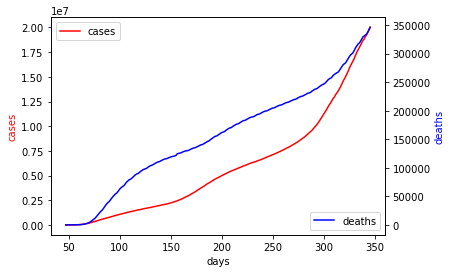

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
df_us = pd.read_csv('./DATA/us.csv')
df_us['date'] = pd.to_datetime(df_us['date'], format='%Y-%m-%d')
df_us = df_us[(df_us['date'] >= pd.Timestamp(2020, 3, 8)) & (df_us['date'] <= pd.Timestamp(2020, 12, 31)) ]

fig, ax = plt.subplots()
ax.plot(df_us['cases'], color = 'red', label = 'cases')
ax.set_xlabel("days")
ax.set_ylabel("cases", color = 'red')
ax.legend(loc="upper left")
ax2 = ax.twinx()
ax2.plot(df_us['deaths'], color = 'blue', label = 'deaths')
ax2.set_ylabel("deaths", color = 'blue')
df_us_cd = df_us.iloc[:,1:3]
ax2.legend(loc="lower right")
plt.show()



### Processing data -> us-states (Cases and deaths)

In [2]:
region_states = pd.read_csv('./DATA/us-states.csv')
NE_region = {"Maine", "New Hampshire", "Vermont",
"Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Pennsylvania"}
MW_region = {"Ohio",
"Michigan", "Indiana", "Wisconsin", "Illinois", "Minnesota", "Iowa",
"Missouri", "North Dakota", "South Dakota", "Nebraska", "Kansas"}
S_region = {"Delaware", "Maryland", "Virginia", "West Virginia", "Kentucky", "North Carolina", "South Carolina",
"Tennessee", "Georgia", "Florida", "Alabama", "Mississippi",
"Arkansas", "Louisiana", "Texas", "Oklahoma"}
W_region = {"Montana", "Idaho", "Wyoming", "Colorado", "New Mexico",
"Arizona", "Utah", "Nevada", "California", "Oregon", "Washington",
"Alaska", "Hawaii"}
region_states['date'] = pd.to_datetime(region_states['date'], format='%Y-%m-%d')
region_states = region_states[(region_states['date'] >= pd.Timestamp(2020, 3, 8))& (region_states['date'] <= pd.Timestamp(2020, 12, 31))]
agg_funtion = {"cases":'sum', "deaths":'sum' }
NE_region_covid = region_states[region_states['state'].isin(NE_region)]
NE_region_covid = NE_region_covid.groupby(NE_region_covid['date']).aggregate(agg_funtion)
MW_region_covid = region_states[region_states['state'].isin(MW_region)]
MW_region_covid = MW_region_covid.groupby(MW_region_covid['date']).aggregate(agg_funtion)
S_region_covid = region_states[region_states['state'].isin(S_region)]
S_region_covid = S_region_covid.groupby(S_region_covid['date']).aggregate(agg_funtion)
W_region_covid = region_states[region_states['state'].isin(W_region)]
W_region_covid = W_region_covid.groupby(W_region_covid['date']).aggregate(agg_funtion)


### Processing data -> rt.csv

In [45]:
rt_df = pd.read_csv('./DATA/rt.csv')
rt_df['date'] = pd.to_datetime(rt_df['date'], format='%Y-%m-%d')
rt_df = rt_df[(rt_df['date'] >= pd.Timestamp(2020, 3, 8))& (rt_df['date'] <= pd.Timestamp(2020, 12, 31))]

st_code = pd.read_csv('./DATA/state_code.csv')
st_code = st_code[['State','Code']]
NE_code = set()
MW_code = set()
S_code = set()
W_code = set()
for i in NE_region:
    NE_code.add(st_code[st_code['State'] == i]['Code'].values[0])
for i in MW_region:
    MW_code.add(st_code[st_code['State'] == i]['Code'].values[0])
for i in S_region:
    S_code.add(st_code[st_code['State'] == i]['Code'].values[0])
for i in W_region:
    W_code.add(st_code[st_code['State'] == i]['Code'].values[0])

rt_df = rt_df[['date','region','mean']]

agg_funtion = {"mean":'mean' }
All_rt_df = rt_df.groupby(rt_df['date'], as_index=False).aggregate(agg_funtion)

NE_rt_df = rt_df[rt_df['region'].isin(NE_code)]
NE_rt_df = NE_rt_df.groupby(NE_rt_df['date'], as_index=False).aggregate(agg_funtion)
MW_rt_df = rt_df[rt_df['region'].isin(MW_code)]
MW_rt_df = MW_rt_df.groupby(MW_rt_df['date'], as_index=False).aggregate(agg_funtion)
S_rt_df = rt_df[rt_df['region'].isin(S_code)]
S_rt_df = S_rt_df.groupby(S_rt_df['date'], as_index=False).aggregate(agg_funtion)
W_rt_df = rt_df[rt_df['region'].isin(W_code)]
W_rt_df = W_rt_df.groupby(W_rt_df['date'], as_index=False).aggregate(agg_funtion)

region_rt_df = [NE_rt_df, MW_rt_df, S_rt_df, W_rt_df]

          date      mean
0   2020-03-08  2.212656
1   2020-03-09  2.163936
2   2020-03-10  2.108899
3   2020-03-11  2.049000
4   2020-03-12  1.983840
..         ...       ...
294 2020-12-27  0.953674
295 2020-12-28  0.947640
296 2020-12-29  0.942193
297 2020-12-30  0.937396
298 2020-12-31  0.932806

[299 rows x 2 columns]


### Processing Hp data

In [118]:
Hp_df = pd.read_csv('./DATA/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')
Hp_df = Hp_df[['date','state','inpatient_beds_used_covid']]
Hp_df['date'] = pd.to_datetime(Hp_df['date'], format='%Y-%m-%d')
Hp_df = Hp_df[(Hp_df['date'] >= pd.Timestamp(2020, 3, 8))& (Hp_df['date'] <= pd.Timestamp(2020, 12, 31))]
Hp_df = Hp_df.fillna(0)
All_Hp_df = Hp_df.groupby(['date'], as_index=False).sum()


agg_funtion = {"inpatient_beds_used_covid":'sum' }

NE_Hp_df = Hp_df[Hp_df['state'].isin(NE_code)]
NE_Hp_df = NE_Hp_df.groupby(NE_Hp_df['date'], as_index=False).aggregate(agg_funtion)
MW_Hp_df = Hp_df[Hp_df['state'].isin(MW_code)]
MW_Hp_df = MW_Hp_df.groupby(MW_Hp_df['date'], as_index=False).aggregate(agg_funtion)
S_Hp_df = Hp_df[Hp_df['state'].isin(S_code)]
S_Hp_df = S_Hp_df.groupby(S_Hp_df['date'], as_index=False).aggregate(agg_funtion)
W_Hp_df = Hp_df[Hp_df['state'].isin(W_code)]
W_Hp_df = W_Hp_df.groupby(W_Hp_df['date'], as_index=False).aggregate(agg_funtion)
print(W_Hp_df)
region_Hp_df = [NE_Hp_df, MW_Hp_df, S_Hp_df, W_Hp_df]

          date  inpatient_beds_used_covid
0   2020-03-08                        9.0
1   2020-03-09                       14.0
2   2020-03-10                       15.0
3   2020-03-11                       23.0
4   2020-03-12                       28.0
..         ...                        ...
294 2020-12-27                    32490.0
295 2020-12-28                    32937.0
296 2020-12-29                    33223.0
297 2020-12-30                    33605.0
298 2020-12-31                    33252.0

[299 rows x 2 columns]


### Processing data -> us-county.csv (Cases and deaths)

In [123]:
data_county = pd.read_csv('./DATA/us-counties.csv')
data_county['date'] = pd.to_datetime(data_county['date'], format='%Y-%m-%d')
data_county = data_county[(data_county['date'] >= pd.Timestamp(2020, 3, 8))& (data_county['date'] <= pd.Timestamp(2020, 12, 31))]

data_pop = pd.read_csv('./DATA/co-est2020.csv')
#print(data_pop)
data_pop = data_pop[['CTYNAME', 'POPESTIMATE2020']]
data_pop = data_pop.sort_values(by=['POPESTIMATE2020'], ascending=False)
data_pop = data_pop[data_pop['CTYNAME'].str[-6:] == 'County']
#Get the top5 county data
top_county = data_pop['CTYNAME'][:5].to_list()
for i in range(len(top_county)):
    top_county[i] = top_county[i][:-7]
print(top_county)

data_county = data_county[data_county['county'].isin(top_county)]
data_county = data_county[['date','cases','deaths']]
county_df = data_county.groupby(['date']).sum()
print(county_df)

['Los Angeles', 'Cook', 'Harris', 'Maricopa', 'San Diego']
              cases   deaths
date                        
2020-03-08       30      0.0
2020-03-09       40      0.0
2020-03-10       48      0.0
2020-03-11       62      1.0
2020-03-12       76      1.0
...             ...      ...
2020-12-27  1788077  27290.0
2020-12-28  1813396  27430.0
2020-12-29  1836643  27815.0
2020-12-30  1856589  28258.0
2020-12-31  1883215  28745.0

[299 rows x 2 columns]


In [124]:
def preprcocess_data(df, seq_length, target, sc):
    #sc = MinMaxScaler()
    all = sc.fit_transform(df)
    x, y = sliding_windows(all, seq_length)
    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))
    #We use 90(0.142) days to train the real-time forecasting network!
    train_size = 90
    test_size = len(y) - train_size
    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    together = [dataX, dataY, trainX, trainY]
    return together


In [125]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from sklearn.preprocessing import MinMaxScaler
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

seq_length = 4
#len(t_data) = 644
'''
Deaths and Cases data
'''
#All US
sc_cd = MinMaxScaler()
CD_together = preprcocess_data(df_us_cd, seq_length, 'CD',sc_cd)
#Four region
NE_CD_together = preprcocess_data(NE_region_covid, seq_length, 'CD',sc_cd)
MW_CD_together = preprcocess_data(MW_region_covid, seq_length, 'CD',sc_cd)
S_CD_together = preprcocess_data(S_region_covid, seq_length, 'CD',sc_cd)
W_CD_together = preprcocess_data(W_region_covid, seq_length, 'CD',sc_cd)
Region_CD_together = [NE_CD_together,MW_CD_together,S_CD_together,W_CD_together]

county_CD = preprcocess_data(county_df, seq_length, 'CD', sc_cd)
'''
Rt_data
'''
sc_rt = MinMaxScaler()
Rt_together = preprcocess_data(All_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
NE_Rt_together = preprcocess_data(NE_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
MW_Rt_together = preprcocess_data(MW_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
S_Rt_together = preprcocess_data(S_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
W_Rt_together = preprcocess_data(W_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
Region_Rt_together = [NE_Rt_together,MW_Rt_together,S_Rt_together,W_Rt_together]

'''
Hospitalization data
'''
sc_hp = MinMaxScaler()
Hp_together = preprcocess_data(All_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_hp)
NE_Hp_together = preprcocess_data(NE_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
MW_Hp_together = preprcocess_data(MW_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
S_Hp_together = preprcocess_data(S_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
W_Hp_together = preprcocess_data(W_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
Region_Hp_together = [NE_Hp_together,MW_Hp_together,S_Hp_together,W_Hp_together]

Region_targets_dict = {'CD':Region_CD_together, 'Rt':Region_Rt_together, 'Hp':Region_Hp_together}

              cases  deaths
date                       
2020-03-08      288      20
2020-03-09      391      24
2020-03-10      505      27
2020-03-11      622      33
2020-03-12      787      37
...             ...     ...
2020-12-27  4285205   51745
2020-12-28  4347657   52203
2020-12-29  4400803   53143
2020-12-30  4452725   53923
2020-12-31  4512632   54938

[299 rows x 2 columns]               cases   deaths
date                        
2020-03-08       30      0.0
2020-03-09       40      0.0
2020-03-10       48      0.0
2020-03-11       62      1.0
2020-03-12       76      1.0
...             ...      ...
2020-12-27  1788077  27290.0
2020-12-28  1813396  27430.0
2020-12-29  1836643  27815.0
2020-12-30  1856589  28258.0
2020-12-31  1883215  28745.0

[299 rows x 2 columns]


### Vanilla RNN

In [8]:

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, drop_prob):
        """
        The __init__ method that initiates an RNN instance.
        """
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=drop_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())
        out = self.fc(h0[0])
        return out

### LSTM

In [9]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, layer_dim, output_dim, drop_prob=0.2):
        super(LSTM, self).__init__()
        
        self.output_dim = output_dim
        self.layer_dim = layer_dim
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=layer_dim, batch_first=True, dropout=drop_prob)
        
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.layer_dim, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.layer_dim, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        out, (h_out, _) = self.lstm(x, (h_0, c_0))
        #out = out[:, -1, :]
        out = self.fc(h_out[0])
        return out

### GRU Model

In [10]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        h = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        out, _ = self.gru(x, h)
        out = out[:, -1, :]
        out = self.fc(out)
        return out
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.layer_dim, batch_size, self.hidden_dim).zero_().to('cpu')
        return hidden

### Setting the config!

In [11]:
import torch.optim as optim

hidden_dim = 64
layer_dim = 1
batch_size = 8
dropout = 0.00
n_epochs = 2000
learning_rate = 1e-3
weight_decay = 1e-6
criterion = nn.MSELoss()    # mean-squared error for regression


In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates
import datetime as dt
def calculate_metrics(pred, gt):
    return {'mae' : mean_absolute_error(gt, pred),
            'rmse' : mean_squared_error(gt, pred) ** 0.5,
            'r2' : r2_score(gt, pred)}

def RealTime_SlidingWindow(train, pred, window_size):
    #train_array shape is (Total row, slide_window_size, dim)
    #pred array shape is (1, dim)
    if (window_size == 1) :
        pred = torch.unsqueeze(pred, 0)
        train = torch.cat((train,pred), 0)
    else:
        pred = torch.unsqueeze(pred, 0)
        pred = torch.unsqueeze(pred, 0)
        train_past = train[-1,1:window_size,:]
        train_past = torch.unsqueeze(train_past, 0)
        pred = torch.cat((train_past, pred), 1)
        train = torch.cat((train, pred), 0)
    return pred, train
def Evaluation(model, dataX, dataY, name, sc,model_type):
  model.eval()

  if (model_type [:3]== 'GRU'):
    h = model.init_hidden(batch_size).cpu()
    train_predict = model(dataX, h)
  else:
    train_predict = model(dataX)
  data_predict = train_predict.data.numpy()

  dataY_plot = dataY.data.numpy()
  if model_type[:3] == 'ESN' :
    data_predict = sc.inverse_transform(data_predict.reshape(-1,1))
  else:
    data_predict = sc.inverse_transform(data_predict)
  dataY_plot = sc.inverse_transform(dataY_plot)
  train_size = 90
  for i in range(len(name)):
    start = dt.datetime(2020,3,8)
    if model_type[:3] == 'ESN' :
      end = dt.datetime(2020,12,30)
    else:
      end = dt.datetime(2020,12,27)
    days = mdates.drange(start,end,dt.timedelta(days=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.axvline(x=dt.datetime(2020,6,6), c='r', linestyle='--')
    plt.plot(days, dataY_plot[:,i], label='gt')
    plt.plot(days, data_predict[:,i], label='pred')
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title('Normal_{}_{}'.format(model_type, name[i]))
    result = calculate_metrics(dataY_plot[train_size+1:,i], data_predict[train_size+1:,i])
    print(result)
    plt.text(1, 0, '$R^2$ = {:.3f}'.format(result['r2']), fontsize = 12, transform=ax.transAxes)
    plt.show()

def Realtime_Evaluation(model, dataX, trainX, dataY, name, sc,model_type):
  #RNN Result with real-time forecasting
  model.eval()
  if (model_type[:3] == 'GRU'):
    h = model.init_hidden(batch_size).cpu()
    train_predict = model(trainX, h)
  else:
    train_predict = model(trainX) #train_predict = model(trainX)
  train_new = trainX.clone()
  for steps in range(trainX.shape[0], dataX.shape[0]):
    #Shape = (1,S,2)
    lastest_pred, train_new = RealTime_SlidingWindow(train_new, train_predict[steps - 1], seq_length)
    #real_time_pred shape = (2)
    if (model_type[:3] == 'GRU'):
      h = model.init_hidden(batch_size).cpu()
      real_time_pred = model(lastest_pred, h)
    else:
      real_time_pred = model(lastest_pred)
    train_predict = torch.cat((train_predict, real_time_pred), 0)
  
  data_predict = train_predict.data.numpy()
  dataY_plot = dataY.data.numpy()
  if model_type[:3] == 'ESN' :
    data_predict = sc.inverse_transform(data_predict.reshape(-1,1))
  else:
    data_predict = sc.inverse_transform(data_predict)
  dataY_plot = sc.inverse_transform(dataY_plot)
  train_size = 90
  for i in range(len(name)):
    start = dt.datetime(2020,3,8)
    if model_type == 'ESN' :
      end = dt.datetime(2020,12,30)
    else:
      end = dt.datetime(2020,12,27)
    days = mdates.drange(start,end,dt.timedelta(days=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.axvline(x=dt.datetime(2020,6,6), c='r', linestyle='--')
    plt.plot(days, dataY_plot[:,i], label='gt')
    plt.plot(days, data_predict[:,i], label='pred')
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title('Real-Time_{}_{}'.format(model_type, name[i]))
    result = calculate_metrics(dataY_plot[train_size:,i], data_predict[train_size:,i])
    print(result)
    plt.text(1, 0, '$R^2$ = {:.3f}'.format(result['r2']), fontsize = 12, transform=ax.transAxes)
    plt.show()
  


### Train RNN

Train RNN
Epoch: 0, loss: 0.017579
{'mae': 831875.6, 'rmse': 1079152.3244028157, 'r2': -7.855604594652563}


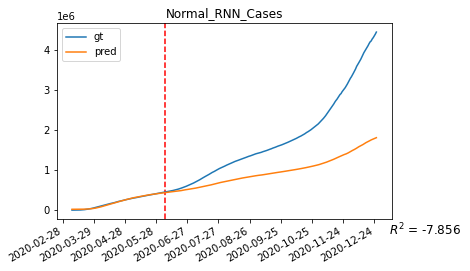

{'mae': 5891.4927, 'rmse': 7118.964531446972, 'r2': 0.7173608414701178}


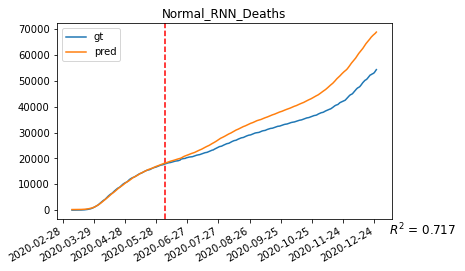

{'mae': 1060533.1, 'rmse': 1433841.2139926793, 'r2': -163.1350365097965}


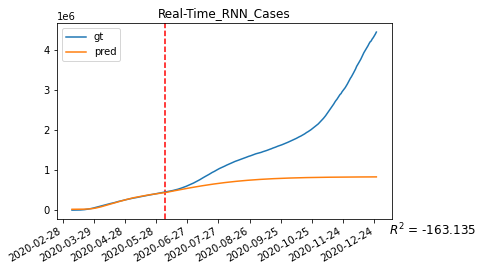

{'mae': 4216.5605, 'rmse': 5962.618552280533, 'r2': -0.47944109208872865}


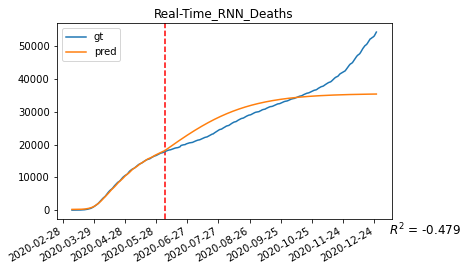

Train RNN
Epoch: 0, loss: 0.031353
{'mae': 0.0032007222, 'rmse': 0.003666665675029356, 'r2': 0.9892788300739587}


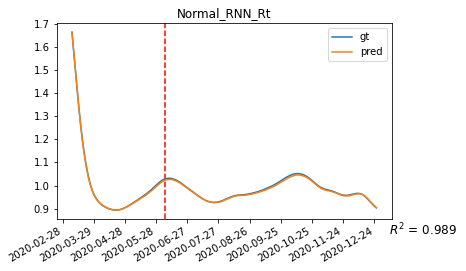

{'mae': 0.06164894, 'rmse': 0.07077784989045119, 'r2': -13.310820392294838}


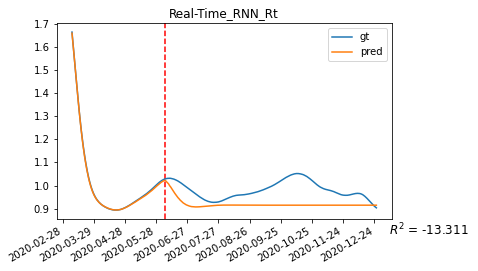

Train RNN
Epoch: 0, loss: 0.150272
{'mae': 2934.0212, 'rmse': 4141.69192480561, 'r2': 0.9718275325945002}


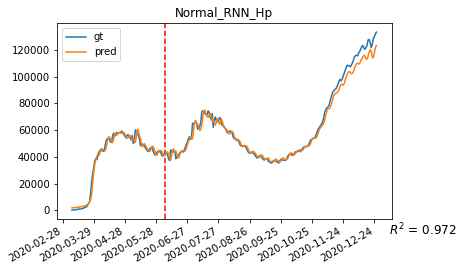

{'mae': 20946.719, 'rmse': 30542.81401573863, 'r2': -219.67075436860446}


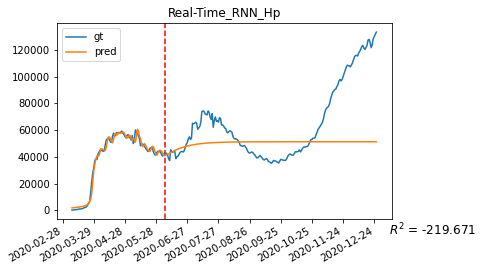

In [31]:
#Train RNN
region_name = ['NE', 'MW', 'S', 'W']
tar = [['Cases', 'Deaths'], ['Rt'], ['Hp']]
for tar, Data, sc in zip(tar, [CD_together, Rt_together, Hp_together], [sc_cd, sc_rt,sc_hp]):
  input_dim = output_dim = Data[1].shape[1]
  RNN_model = RNNModel(input_dim, 64, 1, output_dim, dropout)
  optimizer = torch.optim.Adam(RNN_model.parameters(), lr=learning_rate)
  RNN_model.train()
  print("Train RNN")
  for epoch in range(1000): #n_epochs
    outputs = RNN_model(Data[2])
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, Data[3])
    
    loss.backward()
    
    optimizer.step()
    if epoch % 1000 == 0:
      print("Epoch: %d, loss: %f" % (epoch, loss.item()))
  Evaluation(RNN_model, Data[0], Data[1], tar, sc,'RNN')
  Realtime_Evaluation(RNN_model, Data[0], Data[2], Data[1], tar, sc,'RNN')

  
  

### Use Region data to predict National data (RNN)

In [ ]:

#Train RNN
tar = [['Cases','Deaths'], ['Rt'], ['Hp']]
targets = ['CD','Rt','Hp']

# for targets in [['CD'],['Rt'], ['Hp']]:
#   print("Target", targets)
idx = 0
for t, Data, sc in zip(tar, [CD_together, Rt_together, Hp_together], [sc_cd, sc_rt,sc_hp]):
  Region_Data = Region_targets_dict[targets[idx]]
  idx += 1
  for i, R_Data in enumerate(Region_Data):
    input_dim = output_dim = R_Data[1].shape[1]
    RNN_model = RNNModel(input_dim, 64, 1, output_dim, dropout)
    optimizer = torch.optim.Adam(RNN_model.parameters(), lr=learning_rate)
    RNN_model.train()
    print("Train RNN")
    for epoch in range(2000):
      outputs = RNN_model(R_Data[2])
      optimizer.zero_grad()
      # obtain the loss function
      loss = criterion(outputs, R_Data[3])
      
      loss.backward()
      
      optimizer.step()
      if epoch % 1000 == 0:
        print("Epoch: %d, loss: %f" % (epoch, loss.item()))
    Evaluation(RNN_model, Data[0], Data[1], t, sc,'RNN-{}'.format(region_name[i]))
    Realtime_Evaluation(RNN_model, Data[0], Data[2], Data[1], t, sc,'RNN-{}'.format(region_name[i]))

  
  

### Use County data to predict National data

Train RNN
Epoch: 0, loss: 0.012089
{'mae': 324093.03, 'rmse': 409033.2679281723, 'r2': -6.465180859280915}


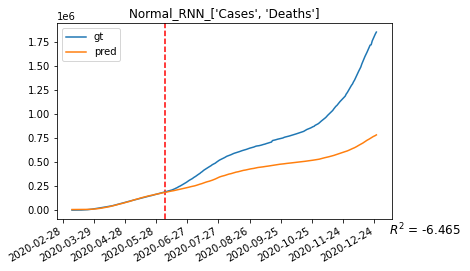

{'mae': 407656.44, 'rmse': 534902.3976166119, 'r2': -63.737659372869345}


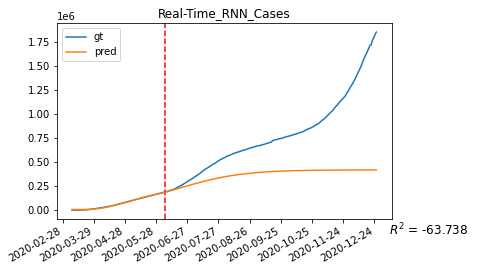

{'mae': 2174.4763, 'rmse': 3124.9265591370304, 'r2': -0.18145749291980495}


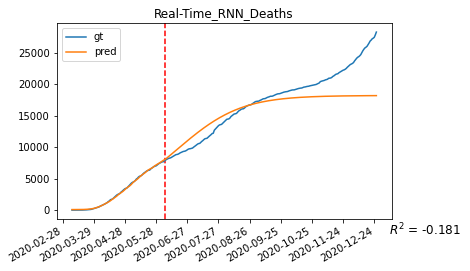

In [127]:
t = ['Cases', 'Deaths']
County_Data = county_CD
input_dim = output_dim = County_Data[1].shape[1]
RNN_model = RNNModel(input_dim, 64, 1, output_dim, dropout)
optimizer = torch.optim.Adam(RNN_model.parameters(), lr=learning_rate)
RNN_model.train()
print("Train RNN")
for epoch in range(1000): #n_epochs
    outputs = RNN_model(County_Data[2])
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, County_Data[3])

    loss.backward()

    optimizer.step()
    if epoch % 1000 == 0:
        print("Epoch: %d, loss: %f" % (epoch, loss.item()))
Evaluation(RNN_model, County_Data[0], County_Data[1], tar, sc_cd,'RNN')
Realtime_Evaluation(RNN_model, County_Data[0], County_Data[2], County_Data[1], t, sc_cd,'RNN')

### Train LSTM

Train RNN
Epoch: 0, loss: 0.017385
Epoch: 1000, loss: 0.000005
{'mae': 916815.7, 'rmse': 1186040.6785873745, 'r2': -14.857570791752797}


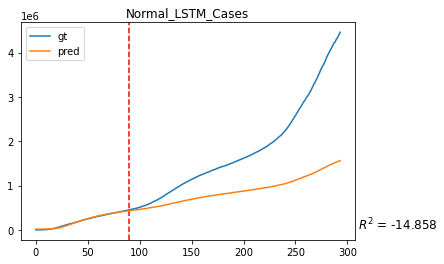

{'mae': 1760.2251, 'rmse': 1967.9184434320443, 'r2': 0.9628329999353855}


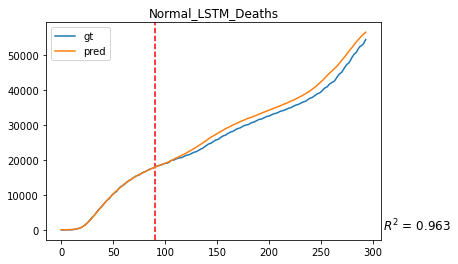

{'mae': 1340321.9, 'rmse': 1700540.9253669844, 'r2': -169388.43594133286}


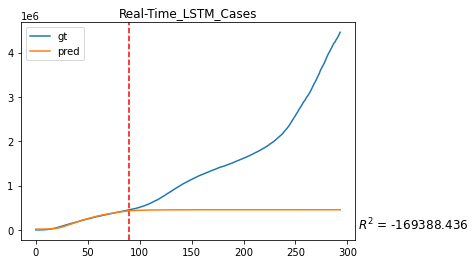

{'mae': 13448.904, 'rmse': 16378.780418578179, 'r2': -8814.235897570885}


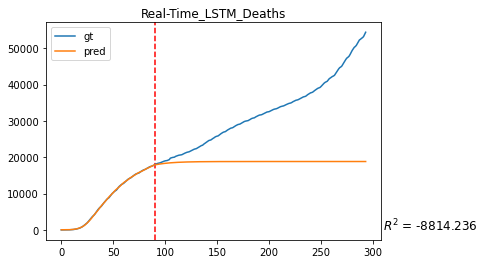

Train RNN
Epoch: 0, loss: 0.053329
Epoch: 1000, loss: 0.000248
{'mae': 0.003657325, 'rmse': 0.004168956922935278, 'r2': 0.9866085700183101}


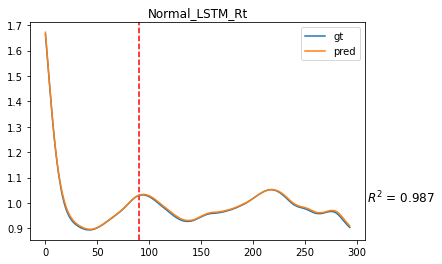

{'mae': 0.07391705, 'rmse': 0.08336992379381807, 'r2': -522.8945847867385}


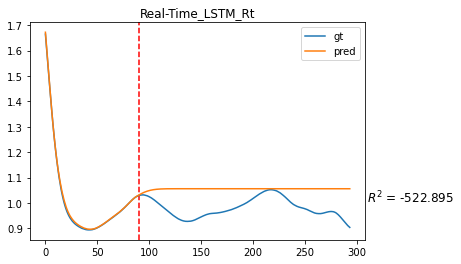

In [ ]:
#Train LSTM
tar = [['Cases', 'Deaths'], ['Rt']]
for tar, Data, sc in zip(tar, [CD_together, Rt_together], [sc_cd, sc_rt,sc_hp]):
  input_dim = output_dim = Data[1].shape[1]
  LSTM_model = LSTM(input_dim, 64, 1, output_dim, dropout)
  optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=learning_rate)
  LSTM_model.train()
  print("Train LSTM")
  for epoch in range(n_epochs):
    outputs = LSTM_model(Data[2])
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, Data[3])
    
    loss.backward()
    
    optimizer.step()
    if epoch % 1000 == 0:
      print("Epoch: %d, loss: %f" % (epoch, loss.item()))
  Evaluation(LSTM_model, Data[0], Data[1], tar, sc, 'LSTM')
  Realtime_Evaluation(LSTM_model, Data[0], Data[2], Data[1], tar, sc,'LSTM')

  
  


### Use Regioned Model to predict Whole US

Train RNN
Epoch: 0, loss: 0.099086
{'mae': 539153.1, 'rmse': 778952.0111329067, 'r2': -2.129707055860747}


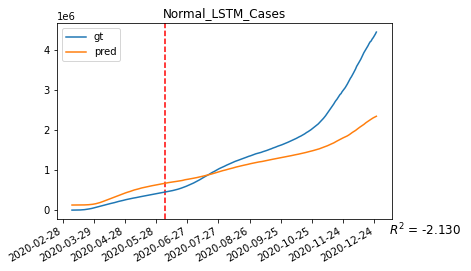

{'mae': 4910.0664, 'rmse': 6776.15908904152, 'r2': 0.777751559358649}


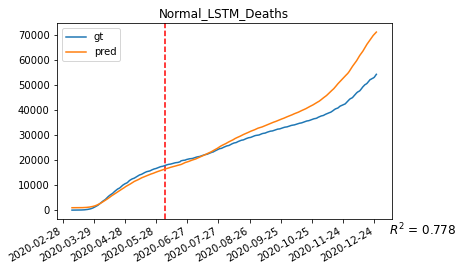

{'mae': 484347.75, 'rmse': 604010.8561673374, 'r2': 0.49812250904989175}


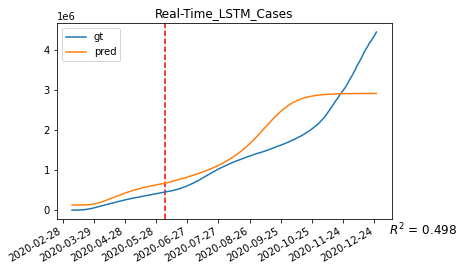

{'mae': 27365.676, 'rmse': 33567.92183022357, 'r2': -0.4562251857991442}


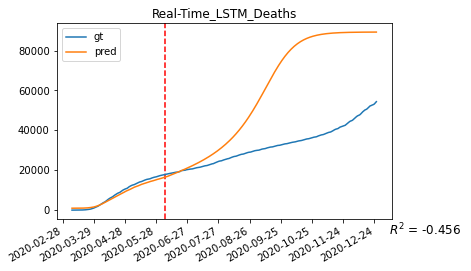

Train RNN
Epoch: 0, loss: 0.039638
{'mae': 614763.4, 'rmse': 814682.463864296, 'r2': -1.4844608712114526}


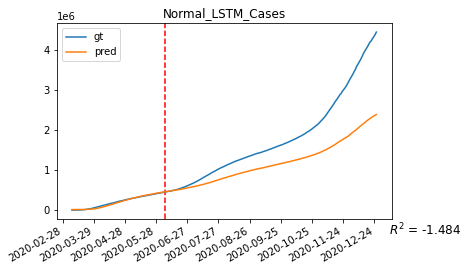

{'mae': 18678.314, 'rmse': 22340.613420405447, 'r2': -0.06449418422508235}


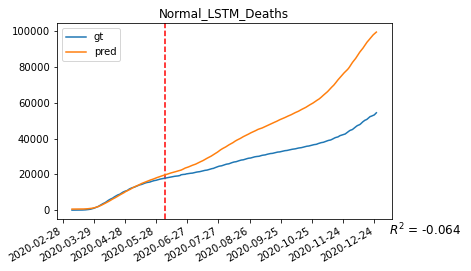

{'mae': 1427721.8, 'rmse': 1614520.4588558176, 'r2': -4.344243745487224}


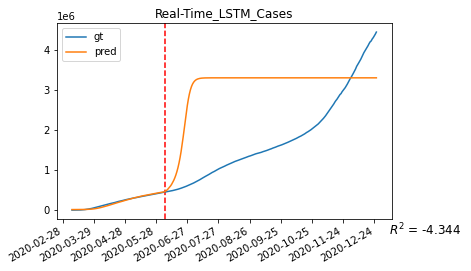

{'mae': 91638.35, 'rmse': 94820.93540985556, 'r2': -10.936054555700466}


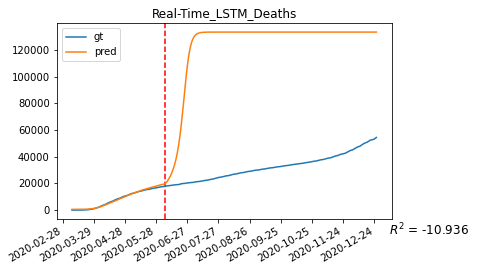

Train RNN
Epoch: 0, loss: 0.013483
{'mae': 482425.03, 'rmse': 750533.1927849693, 'r2': -1.6595883597621013}


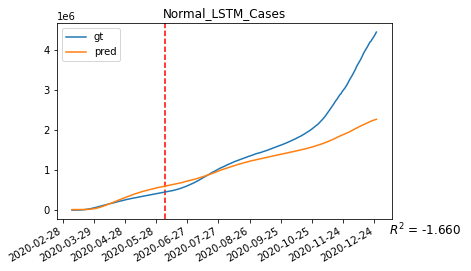

{'mae': 14142.054, 'rmse': 16719.30716267872, 'r2': 0.16696767412243196}


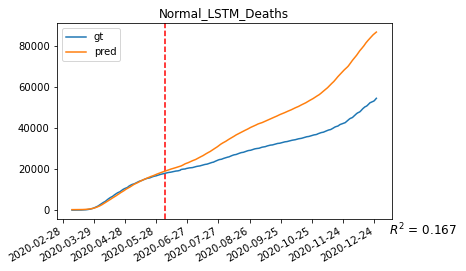

{'mae': 985310.56, 'rmse': 1100285.9153074713, 'r2': -6.690968216540431}


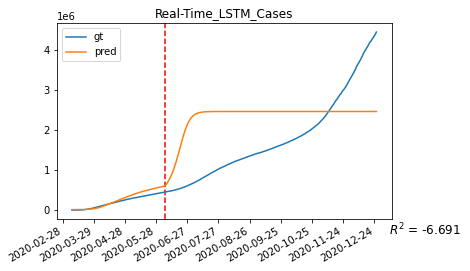

{'mae': 60823.97, 'rmse': 62846.98980858192, 'r2': -11.077987883056139}


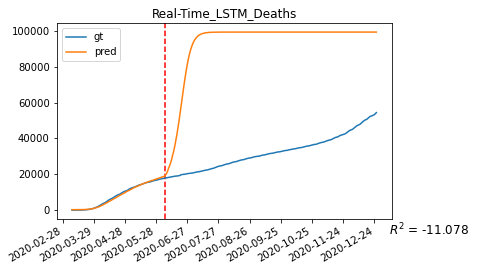

Train RNN
Epoch: 0, loss: 0.006954
{'mae': 879392.9, 'rmse': 1157464.1328974303, 'r2': -13.740435036781617}


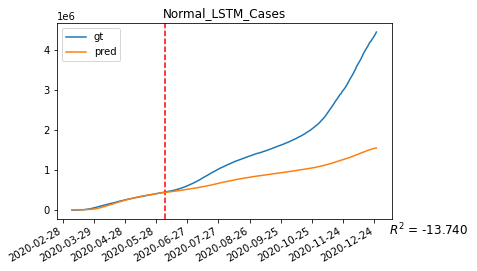

{'mae': 11306.542, 'rmse': 13403.277211189807, 'r2': 0.3477755758838734}


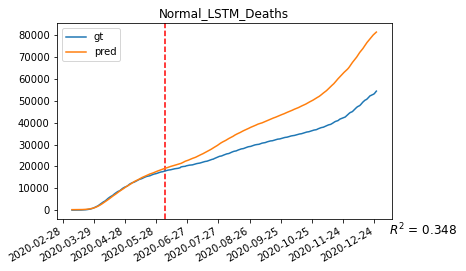

{'mae': 644468.0, 'rmse': 978618.1884596259, 'r2': -8.471506306030745}


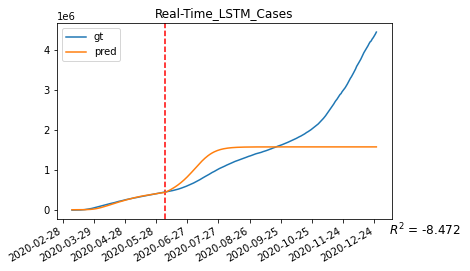

{'mae': 40709.62, 'rmse': 43044.914217593694, 'r2': -4.523745545993806}


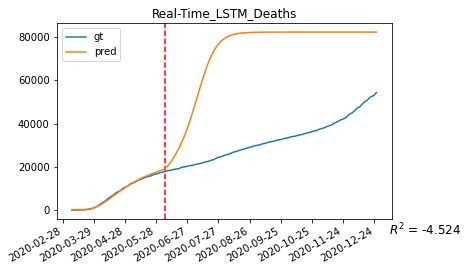

Train RNN
Epoch: 0, loss: 0.054387
{'mae': 0.024633257, 'rmse': 0.027823244975049954, 'r2': -0.2924393503623355}


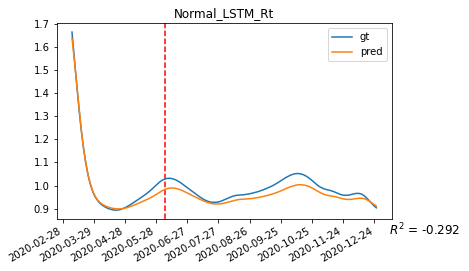

{'mae': 0.071050905, 'rmse': 0.07937475406240674, 'r2': -68.99015806902952}


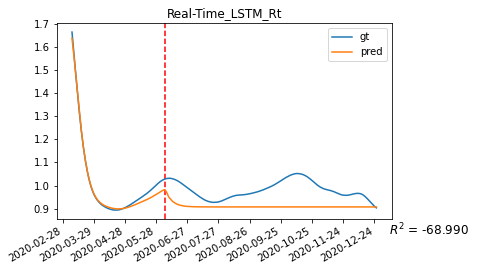

Train RNN
Epoch: 0, loss: 0.056475
{'mae': 0.010278122, 'rmse': 0.012924761799105976, 'r2': 0.7896297893667653}


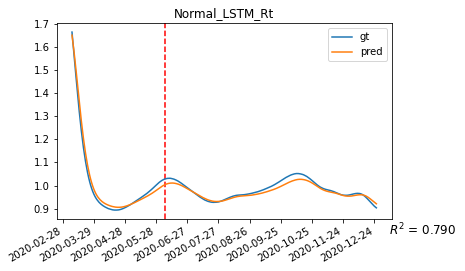

{'mae': 0.039962478, 'rmse': 0.05027208774373074, 'r2': -25.937415130206155}


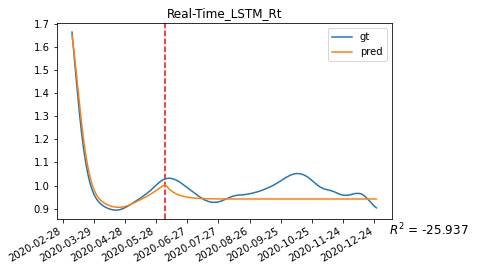

Train RNN
Epoch: 0, loss: 0.046627
{'mae': 0.014361661, 'rmse': 0.017886340563213126, 'r2': 0.47125434202883554}


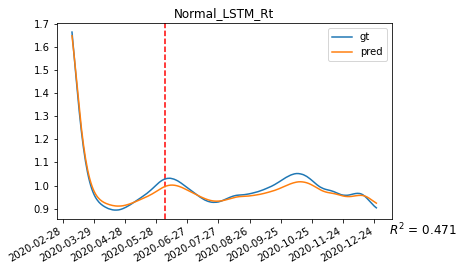

{'mae': 0.04130438, 'rmse': 0.05166781896862349, 'r2': -54.41863240635314}


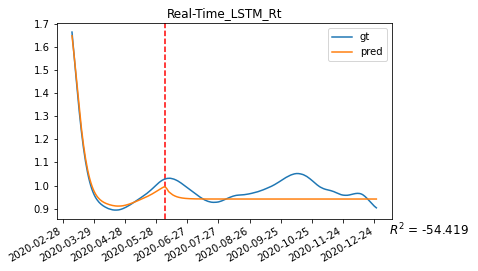

Train RNN
Epoch: 0, loss: 0.048094
{'mae': 0.007880425, 'rmse': 0.009376537518536735, 'r2': 0.9152519673617601}


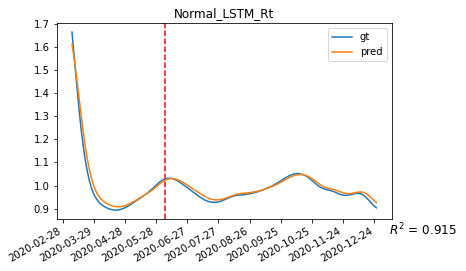

{'mae': 0.046444584, 'rmse': 0.054209826264795924, 'r2': -11434.154462717737}


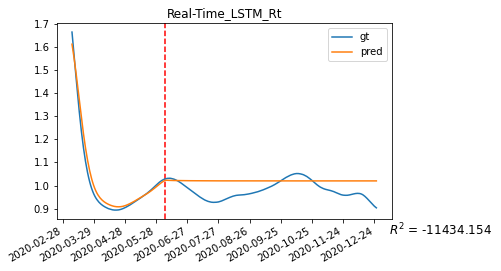

Train RNN
Epoch: 0, loss: 0.336947
{'mae': 745.601, 'rmse': 947.6837222934664, 'r2': 0.9789034152621934}


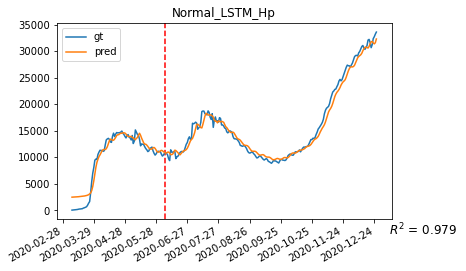

{'mae': 5259.569, 'rmse': 7557.810264884929, 'r2': -194.92612647419858}


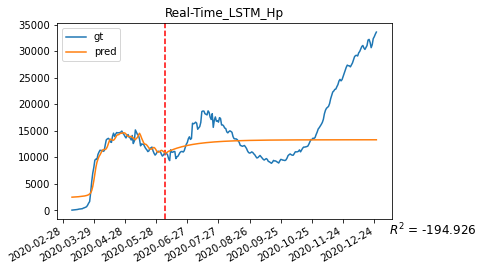

Train RNN
Epoch: 0, loss: 0.054679
{'mae': 620.31134, 'rmse': 803.3368689410439, 'r2': 0.9863859005048736}


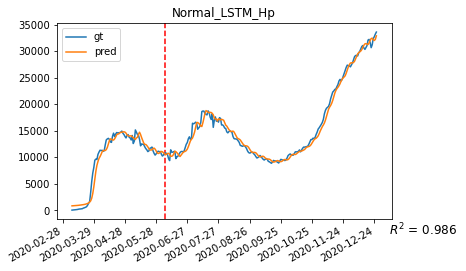

{'mae': 5361.794, 'rmse': 7735.057595131403, 'r2': -86.73208319012285}


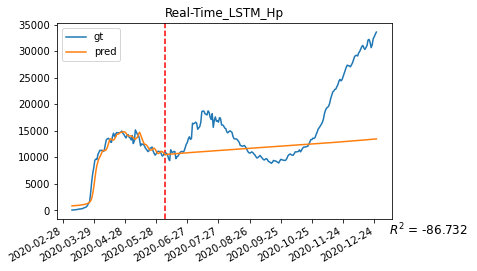

Train RNN
Epoch: 0, loss: 0.059288
{'mae': 773.2035, 'rmse': 1014.0805872809123, 'r2': 0.9812042922481167}


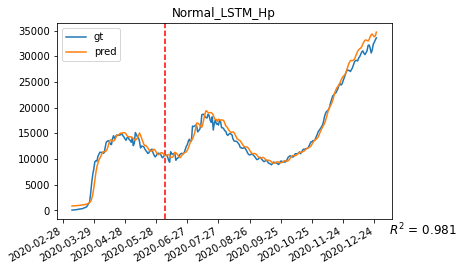

{'mae': 24125.182, 'rmse': 30403.75555749651, 'r2': -0.9679003026873556}


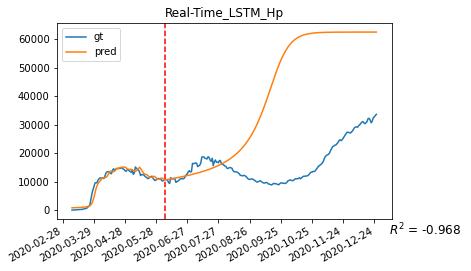

Train RNN
Epoch: 0, loss: 0.042452
{'mae': 866.30634, 'rmse': 1138.6787299321963, 'r2': 0.9771491252807756}


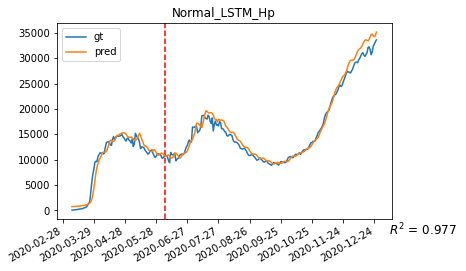

{'mae': 27388.672, 'rmse': 33446.629008018135, 'r2': -1.5634651142050395}


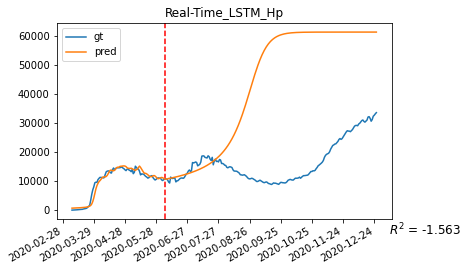

In [64]:

#Train LSTM
tar = [['Cases','Deaths'], ['Rt'], ['Hp']]
targets = ['CD','Rt','Hp']

# for targets in [['CD'],['Rt'], ['Hp']]:
#   print("Target", targets)
idx = 0
for t, Data, sc in zip(tar, [CD_together, Rt_together, Hp_together], [sc_cd, sc_rt,sc_hp]):
  Region_Data = Region_targets_dict[targets[idx]]
  idx += 1
  for i, R_Data in enumerate(Region_Data):
    input_dim = output_dim = R_Data[1].shape[1]
    LSTM_model = LSTM(input_dim, 64, 1, output_dim, dropout)
    optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=learning_rate)
    LSTM_model.train()
    print("Train LSTM")
    for epoch in range(200):
      outputs = LSTM_model(R_Data[2])
      optimizer.zero_grad()
      # obtain the loss function
      loss = criterion(outputs, R_Data[3])
      
      loss.backward()
      
      optimizer.step()
      if epoch % 1000 == 0:
        print("Epoch: %d, loss: %f" % (epoch, loss.item()))
    Evaluation(LSTM_model, Data[0], Data[1], t, sc,'LSTM-{}'.format(region_name[i]))
    Realtime_Evaluation(LSTM_model, Data[0], Data[2], Data[1], t, sc,'LSTM-{}'.format(region_name[i]))

  
  

### Use County data to predict National data (LSTM)

Train LSTM
Epoch: 0, loss: 0.017261
{'mae': 423670.44, 'rmse': 527974.073545283, 'r2': -38.43984019557208}


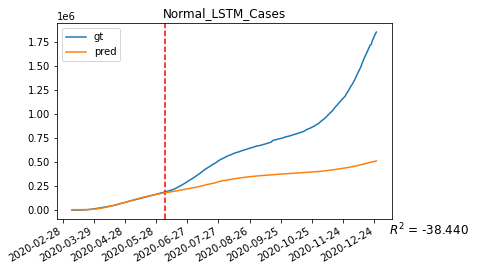

{'mae': 857.82153, 'rmse': 1062.8662309999315, 'r2': 0.9414924914225594}


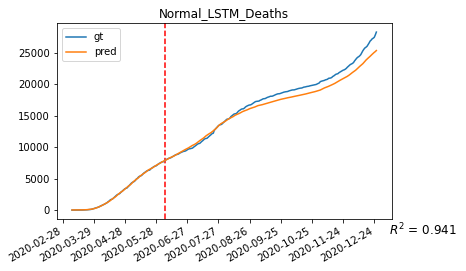

{'mae': 572811.7, 'rmse': 694313.0135378423, 'r2': -25747.08354101298}


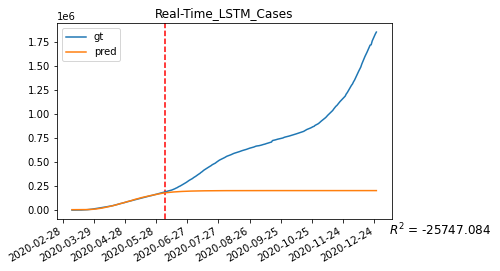

{'mae': 8344.577, 'rmse': 9731.282752032232, 'r2': -2247.12309775501}


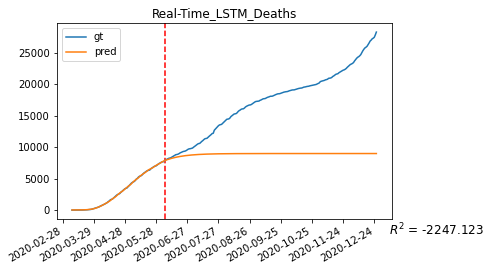

In [131]:

t = ['Cases', 'Deaths']
County_Data = county_CD
input_dim = output_dim = County_Data[1].shape[1]
LSTM_model = LSTM(input_dim, 64, 1, output_dim, dropout)
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=learning_rate)
LSTM_model.train()
print("Train LSTM")
for epoch in range(1000): #n_epochs
    outputs = LSTM_model(County_Data[2])
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, County_Data[3])

    loss.backward()

    optimizer.step()
    if epoch % 1000 == 0:
        print("Epoch: %d, loss: %f" % (epoch, loss.item()))
Evaluation(LSTM_model, County_Data[0], County_Data[1], t, sc_cd,'LSTM')
Realtime_Evaluation(LSTM_model, County_Data[0], County_Data[2], County_Data[1], t, sc_cd,'LSTM')

### Train GRU

Train GRU
Epoch: 0, loss: 0.020559
Epoch: 1000, loss: 0.000005
{'mae': 338084.56, 'rmse': 440164.8470834535, 'r2': -6.909698387441708}


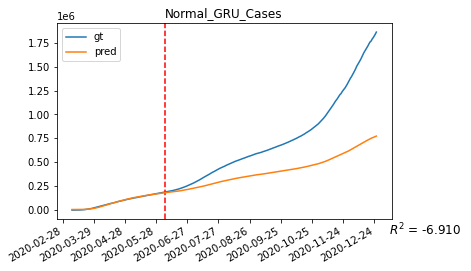

{'mae': 1161.7039, 'rmse': 1304.0991622572265, 'r2': 0.9433715004302506}


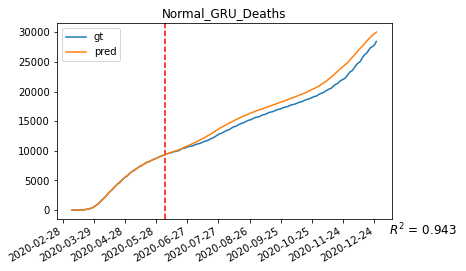

{'mae': 558383.44, 'rmse': 708881.5656906307, 'r2': -146993.51996327}


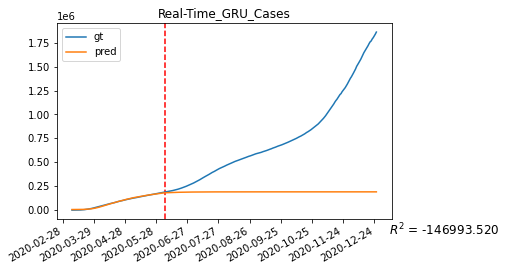

{'mae': 6989.5723, 'rmse': 8529.361523584283, 'r2': -7405.338327212349}


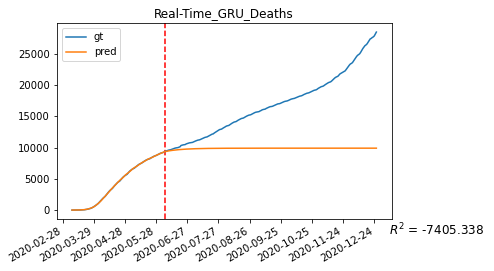

Train GRU
Epoch: 0, loss: 0.081877
Epoch: 1000, loss: 0.000195
{'mae': 0.0014942547, 'rmse': 0.0018598731853553335, 'r2': 0.997409140560472}


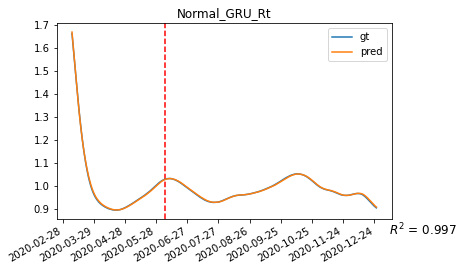

{'mae': 0.036631633, 'rmse': 0.0430868717037854, 'r2': -25.269054161319083}


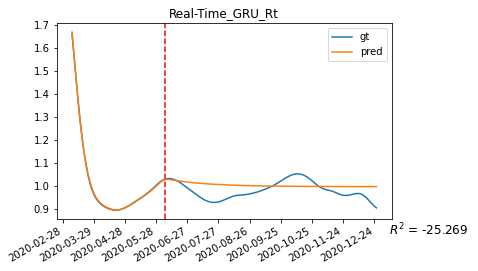

Train GRU
Epoch: 0, loss: 0.055132
Epoch: 1000, loss: 0.000327
{'mae': 706.23944, 'rmse': 1004.6182110632875, 'r2': 0.9738090538936818}


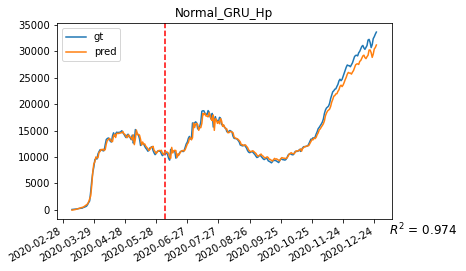

{'mae': 5312.9062, 'rmse': 7754.89935460158, 'r2': -485.62285684907783}


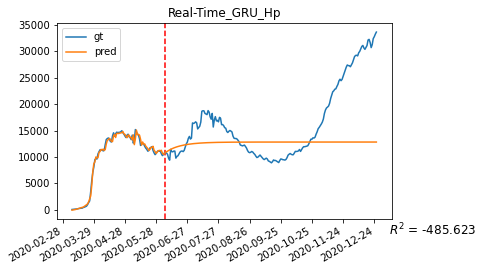

In [132]:
### Better for cases and deaths!
tar = [['Cases', 'Deaths'], ['Rt'], ['Hp']]
for tar, Data, sc in zip(tar, [CD_together, Rt_together, Hp_together], [sc_cd, sc_rt,sc_hp]):
  input_dim = output_dim = Data[1].shape[1]
  GRU_model = GRUNet(input_dim, 64, 1, output_dim, dropout)
  print ("Train GRU")
  optimizer_GRU = torch.optim.Adam(GRU_model.parameters(), lr=learning_rate)
  GRU_model.train()
  #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  for epoch in range(2000):
    h = GRU_model.init_hidden(batch_size)

    outputs = GRU_model(Data[2], h)
    optimizer_GRU.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, Data[3])
    
    loss.backward()
    
    optimizer_GRU.step()
    if epoch % 1000 == 0:
      print("Epoch: %d, loss: %f" % (epoch, loss.item()))
  
  Evaluation(GRU_model, Data[0], Data[1], tar, sc, 'GRU')
  Realtime_Evaluation(GRU_model, Data[0], Data[2], Data[1], tar, sc, 'GRU')


### Use Regioned Model (GRU)to predict US.csv

Train GRU
Epoch: 0, loss: 0.148184
{'mae': 230533.03, 'rmse': 331026.474349107, 'r2': -2.3956686663769617}


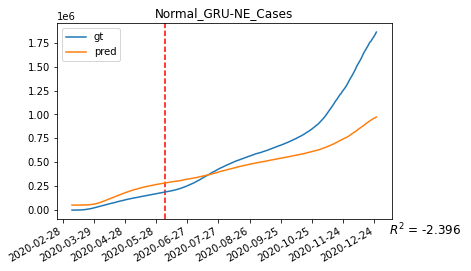

{'mae': 2439.5586, 'rmse': 3424.1423743763926, 'r2': 0.7877995934501371}


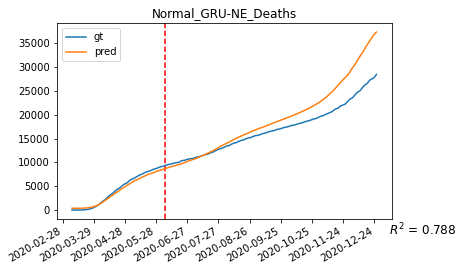

{'mae': 330096.34, 'rmse': 424094.9653650701, 'r2': 0.37863648987089327}


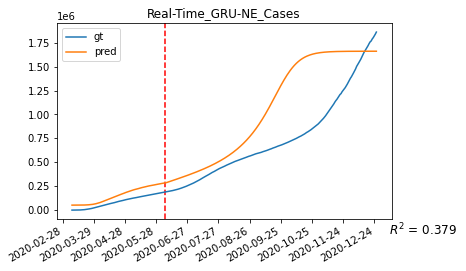

{'mae': 23747.604, 'rmse': 29754.62639657907, 'r2': -0.7695920858867042}


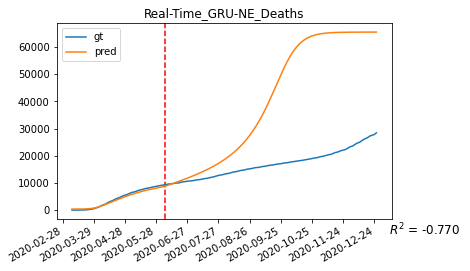

Train GRU
Epoch: 0, loss: 0.006547
{'mae': 418854.53, 'rmse': 538858.7169193795, 'r2': -28.271109013879006}


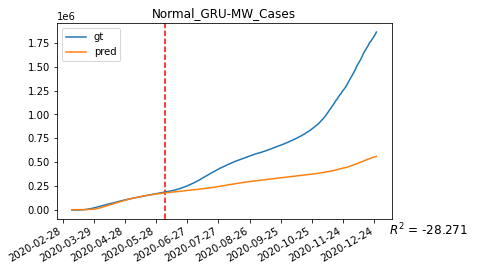

{'mae': 4012.2358, 'rmse': 4932.25019641137, 'r2': 0.597753563800174}


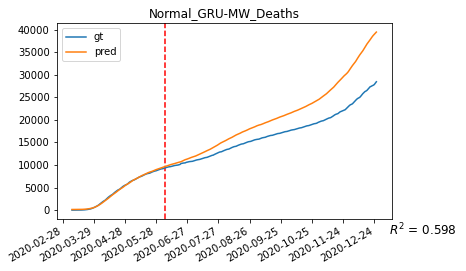

{'mae': 181002.61, 'rmse': 301590.6137531472, 'r2': -0.5103277076944188}


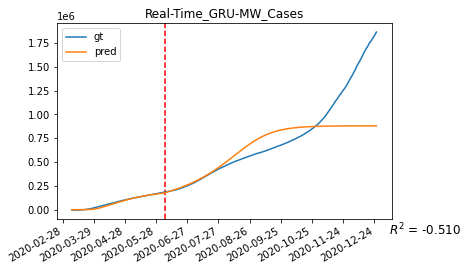

{'mae': 18982.318, 'rmse': 21155.430130347147, 'r2': -1.533585005596927}


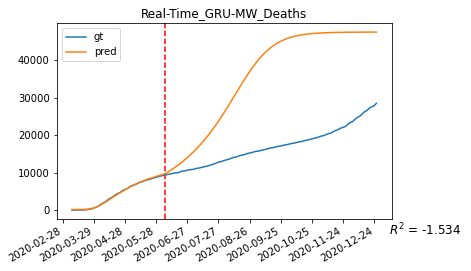

Train GRU
Epoch: 0, loss: 0.015282
{'mae': 273924.53, 'rmse': 378541.102486903, 'r2': -3.771182973739175}


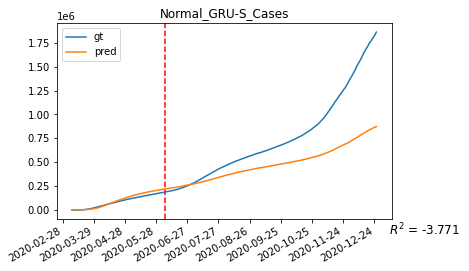

{'mae': 2759.3972, 'rmse': 3544.0066309193044, 'r2': 0.7587286285258479}


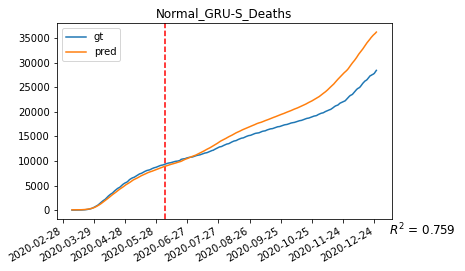

{'mae': 406444.44, 'rmse': 566042.3404092665, 'r2': -133.6844226899351}


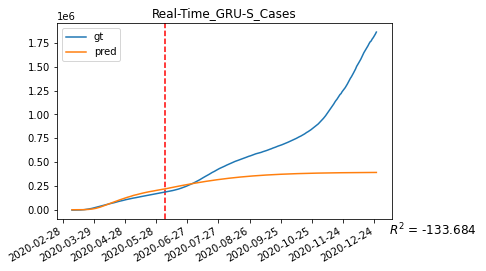

{'mae': 2856.5913, 'rmse': 4335.908439992708, 'r2': -3.6335961937389323}


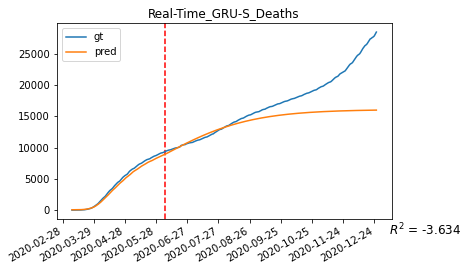

Train GRU
Epoch: 0, loss: 0.005062
{'mae': 398948.53, 'rmse': 515450.0243010956, 'r2': -20.070731012928523}


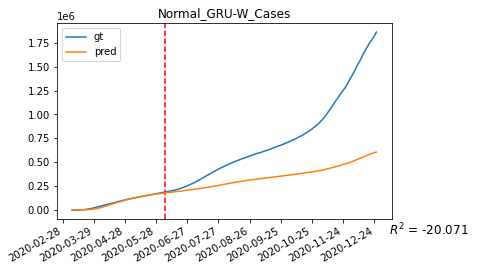

{'mae': 4006.3796, 'rmse': 4897.113435484214, 'r2': 0.5985031164738899}


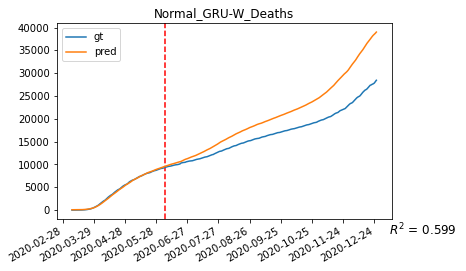

{'mae': 335738.6, 'rmse': 490748.7115174119, 'r2': -20.754144494457087}


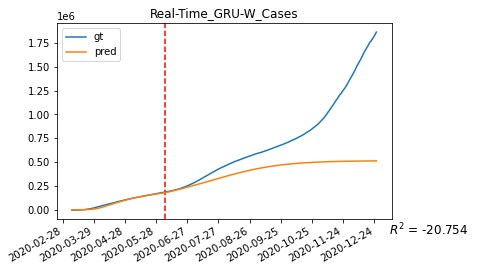

{'mae': 5558.0225, 'rmse': 6180.95785457238, 'r2': -0.10430681495231231}


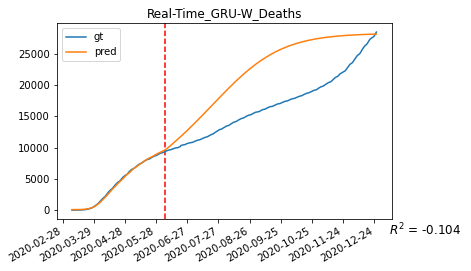

Train GRU
Epoch: 0, loss: 0.032509
{'mae': 0.017112898, 'rmse': 0.01930147704227357, 'r2': 0.5489610504744408}


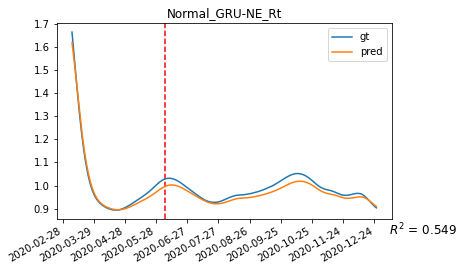

{'mae': 0.07713036, 'rmse': 0.0847744154876778, 'r2': -35.97860068859868}


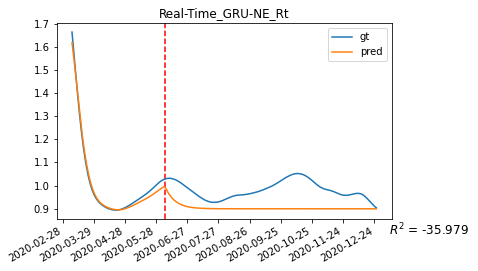

Train GRU
Epoch: 0, loss: 0.158456
{'mae': 0.009813913, 'rmse': 0.012442154283582816, 'r2': 0.8049174003824795}


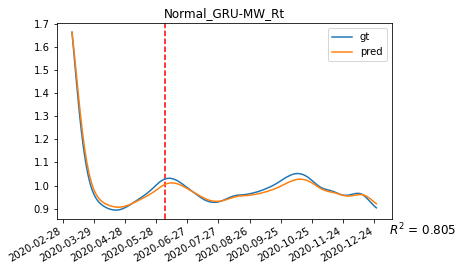

{'mae': 0.038279336, 'rmse': 0.04850606324621695, 'r2': -28.112201304100974}


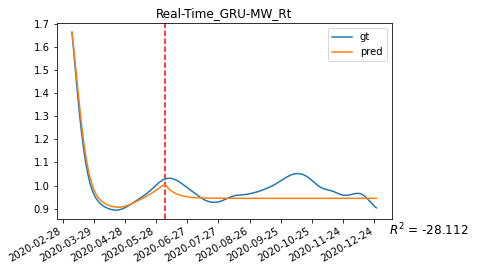

Train GRU
Epoch: 0, loss: 0.059716
{'mae': 0.0116131175, 'rmse': 0.01438771926483292, 'r2': 0.7258531206074831}


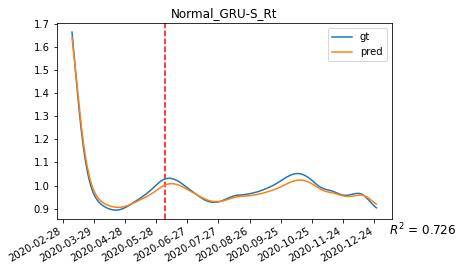

{'mae': 0.0432177, 'rmse': 0.05361219780249308, 'r2': -36.60923381593387}


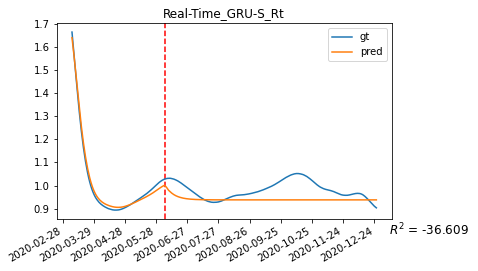

Train GRU
Epoch: 0, loss: 0.034651
{'mae': 0.006943506, 'rmse': 0.008262961408456608, 'r2': 0.9367056220951043}


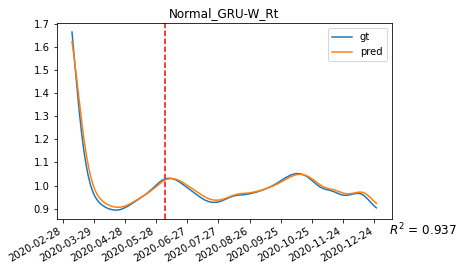

{'mae': 0.047032956, 'rmse': 0.05493132697121825, 'r2': -19681.225184763596}


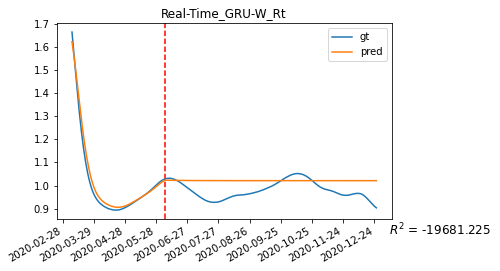

Train GRU
Epoch: 0, loss: 0.298089
{'mae': 735.64703, 'rmse': 890.08844363917, 'r2': 0.9808761201375616}


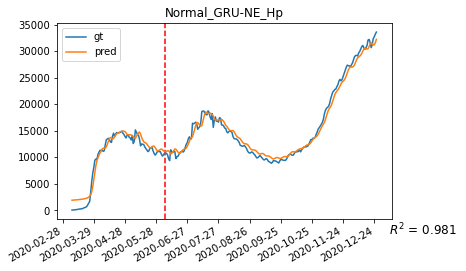

{'mae': 5382.831, 'rmse': 6552.214282210251, 'r2': -13.447565271305201}


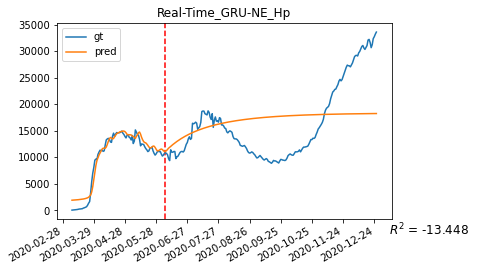

Train GRU
Epoch: 0, loss: 0.113959
{'mae': 686.23065, 'rmse': 879.1425154660648, 'r2': 0.9824108112114844}


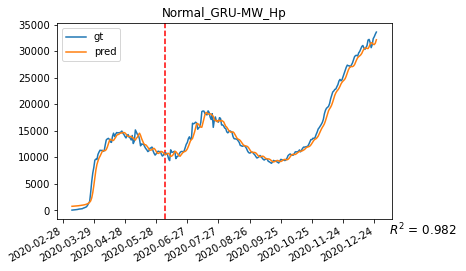

{'mae': 5639.878, 'rmse': 8331.761398407902, 'r2': -535.9229271291138}


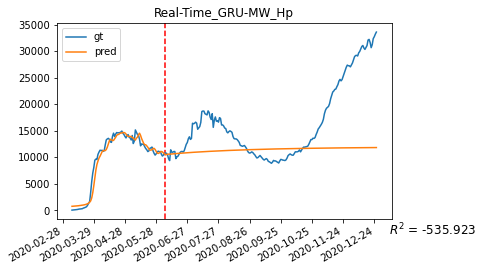

Train GRU
Epoch: 0, loss: 0.044220
{'mae': 834.1707, 'rmse': 1099.3781765161614, 'r2': 0.9691655053472809}


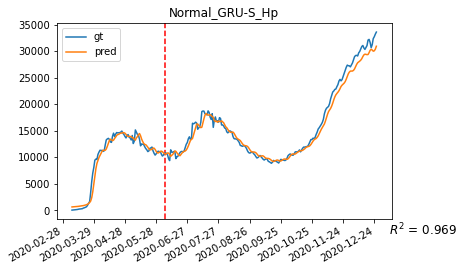

{'mae': 5361.3335, 'rmse': 7770.575010898486, 'r2': -167.72433102176421}


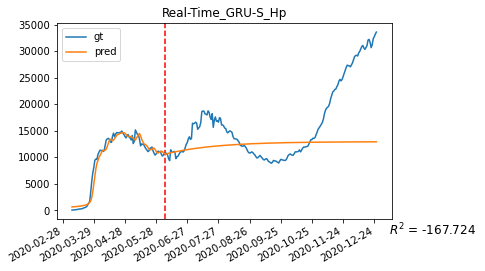

Train GRU
Epoch: 0, loss: 0.022008
{'mae': 1177.4481, 'rmse': 1643.9264734166184, 'r2': 0.9211222093329207}


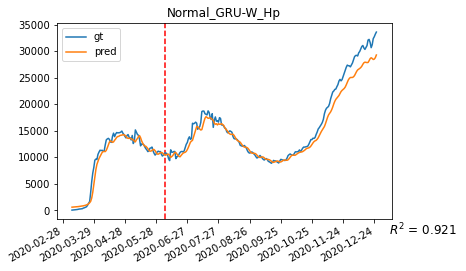

{'mae': 6832.7207, 'rmse': 9778.061157509703, 'r2': -1661.612651982632}


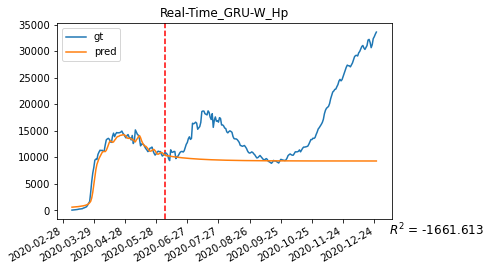

In [138]:

#Train GRU
tar = [['Cases','Deaths'], ['Rt'], ['Hp']]
targets = ['CD','Rt','Hp']


idx = 0
for t, Data, sc in zip(tar, [CD_together, Rt_together, Hp_together], [sc_cd, sc_rt,sc_hp]):
  Region_Data = Region_targets_dict[targets[idx]]
  idx += 1
  for i, R_Data in enumerate(Region_Data):
    
    input_dim = output_dim = R_Data[1].shape[1]
    GRU_model = GRUNet(input_dim, 64, 1, output_dim, dropout)
    optimizer = torch.optim.Adam(GRU_model.parameters(), lr=learning_rate)
    GRU_model.train()
    print("Train GRU")
    for epoch in range(200):
      h = GRU_model.init_hidden(batch_size)
      outputs = GRU_model(R_Data[2], h)
      optimizer.zero_grad()
      # obtain the loss function
      loss = criterion(outputs, R_Data[3])
      
      loss.backward()
      
      optimizer.step()
      if epoch % 1000 == 0:
        print("Epoch: %d, loss: %f" % (epoch, loss.item()))
    Evaluation(GRU_model, Data[0], Data[1], t, sc,'GRU-{}'.format(region_name[i]))
    Realtime_Evaluation(GRU_model, Data[0], Data[2], Data[1], t, sc,'GRU-{}'.format(region_name[i]))

  
  

### Use County data to predict National data


Train GRU
Epoch: 0, loss: 0.007609
{'mae': 387497.2, 'rmse': 485716.58936462115, 'r2': -19.966943906139853}


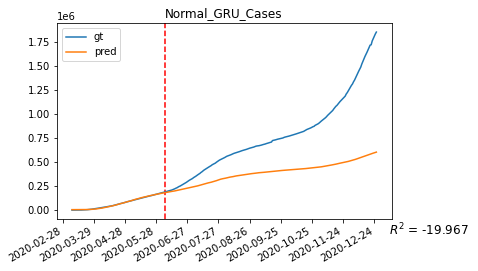

{'mae': 218.52463, 'rmse': 303.96765607133267, 'r2': 0.9962817980988571}


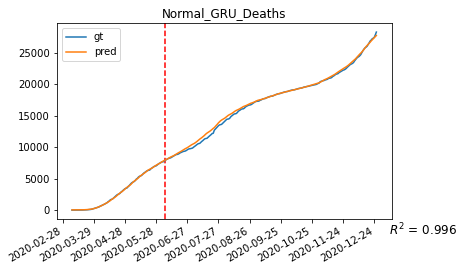

{'mae': 558062.25, 'rmse': 680950.6164767017, 'r2': -7740.135222454483}


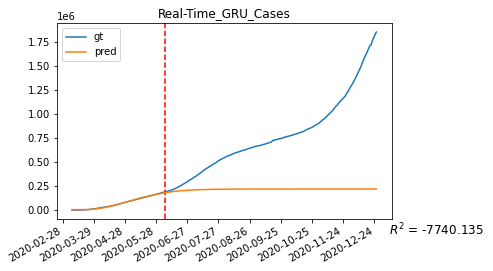

{'mae': 7712.266, 'rmse': 9131.166409610549, 'r2': -643.1795254096392}


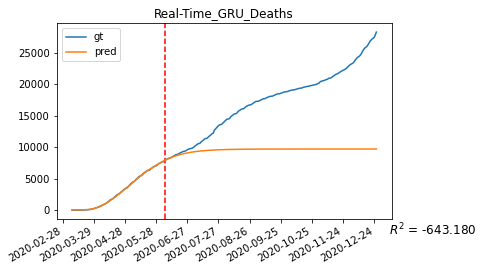

In [130]:
t = ['Cases', 'Deaths']
County_Data = county_CD
input_dim = output_dim = County_Data[1].shape[1]
GRU_model = GRUNet(input_dim, 64, 1, output_dim, dropout)
optimizer = torch.optim.Adam(GRU_model.parameters(), lr=learning_rate)
GRU_model.train()
print("Train GRU")
for epoch in range(1000): #n_epochs
    h = GRU_model.init_hidden(batch_size)
    outputs = GRU_model(County_Data[2], h)
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, County_Data[3])

    loss.backward()

    optimizer.step()
    if epoch % 1000 == 0:
        print("Epoch: %d, loss: %f" % (epoch, loss.item()))
Evaluation(GRU_model, County_Data[0], County_Data[1], t, sc_cd,'GRU')
Realtime_Evaluation(GRU_model, County_Data[0], County_Data[2], County_Data[1], t, sc_cd,'GRU')

In [92]:
import echotorch.nn as etnn
import echotorch.utils.matrix_generation as mg
'''
Cases data
'''
sc_c = MinMaxScaler()
seq_length = 1
C_together = preprcocess_data(df_us.iloc[:,1:2], seq_length, 'C', sc_c)
NE_C_together = preprcocess_data(NE_region_covid['cases'].to_numpy().reshape(-1, 1), seq_length, 'C',sc_c)
MW_C_together = preprcocess_data(MW_region_covid['cases'].to_numpy().reshape(-1, 1), seq_length, 'C',sc_c)
S_C_together = preprcocess_data(S_region_covid['cases'].to_numpy().reshape(-1, 1), seq_length, 'C',sc_c)
W_C_together = preprcocess_data(W_region_covid['cases'].to_numpy().reshape(-1, 1), seq_length, 'C',sc_c)
Region_C_together = [NE_C_together,MW_C_together,S_C_together,W_C_together]

sc_d = MinMaxScaler()
D_together = preprcocess_data(df_us.iloc[:,2:3], seq_length, 'D', sc_d)
NE_D_together = preprcocess_data(NE_region_covid['deaths'].to_numpy().reshape(-1, 1), seq_length, 'D',sc_d)
MW_D_together = preprcocess_data(MW_region_covid['deaths'].to_numpy().reshape(-1, 1), seq_length, 'D',sc_d)
S_D_together = preprcocess_data(S_region_covid['deaths'].to_numpy().reshape(-1, 1), seq_length, 'D',sc_d)
W_D_together = preprcocess_data(W_region_covid['deaths'].to_numpy().reshape(-1, 1), seq_length, 'D',sc_d)
Region_D_together = [NE_D_together,MW_D_together,S_D_together,W_D_together]

'''
Rt_data
'''
Rt_together = preprcocess_data(All_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt', sc_rt)
NE_Rt_together = preprcocess_data(NE_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
MW_Rt_together = preprcocess_data(MW_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
S_Rt_together = preprcocess_data(S_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
W_Rt_together = preprcocess_data(W_rt_df['mean'].to_numpy().reshape(-1, 1), seq_length, 'Rt',sc_rt)
Region_Rt_together = [NE_Rt_together,MW_Rt_together,S_Rt_together,W_Rt_together]
'''
Hospitalization data
'''
Hp_together = preprcocess_data(All_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp', sc_hp)
NE_Hp_together = preprcocess_data(NE_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
MW_Hp_together = preprcocess_data(MW_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
S_Hp_together = preprcocess_data(S_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
W_Hp_together = preprcocess_data(W_Hp_df['inpatient_beds_used_covid'].to_numpy().reshape(-1, 1), seq_length, 'Hp',sc_hp)
Region_Hp_together = [NE_Hp_together,MW_Hp_together,S_Hp_together,W_Hp_together]

Region_targets_dict = {'C':Region_C_together, 'D':Region_D_together, 'Rt':Region_Rt_together, 'Hp':Region_Hp_together}

In [78]:
import torch
n_hidden = 64
spectral_radius = 1
connectivity = 0.1
dtype = torch.float64
input_scaling = 1.0
bias_scaling = 0.0

w_matrix_generator = mg.matrix_factory.get_generator(
            name='normal',
            connectivity=connectivity,
            spectral_radius=spectral_radius,
            dtype=dtype
        )

# Matrix generator for Win
win_matrix_generator = mg.matrix_factory.get_generator(
    name='normal',
    connectivity=connectivity,
    scale=input_scaling,
    apply_spectral_radius=False,
    dtype=dtype
)
# Matrix generator for Wbias
wbias_matrix_generator = mg.matrix_factory.get_generator(
name='normal',
connectivity=connectivity,
scale=bias_scaling,
apply_spectral_radius=False,
dtype=dtype
)


{'mae': 579665.75, 'rmse': 902156.0226213646, 'r2': -4.014619447690929}


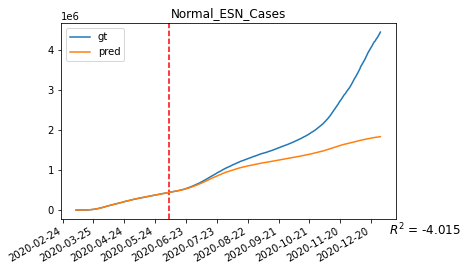

{'mae': 1250714.6, 'rmse': 1630140.4609124945, 'r2': -9615.966094308145}


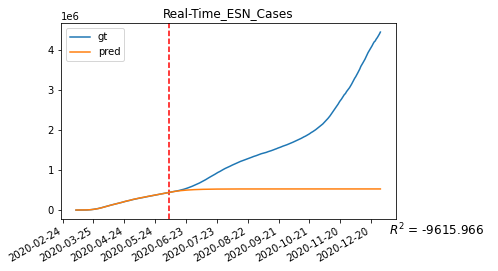

{'mae': 4359.6533, 'rmse': 5573.539629355837, 'r2': 0.18339225727847397}


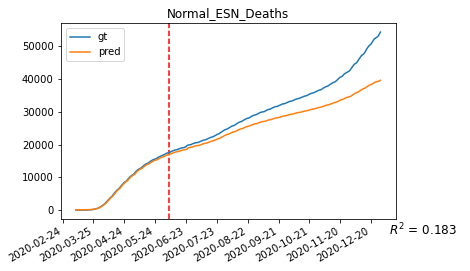

{'mae': 20587.543, 'rmse': 22988.856430888423, 'r2': -472.8300971007709}


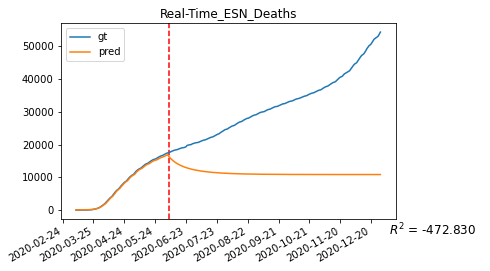

{'mae': 0.006524723, 'rmse': 0.007947829062660824, 'r2': 0.9397106819087149}


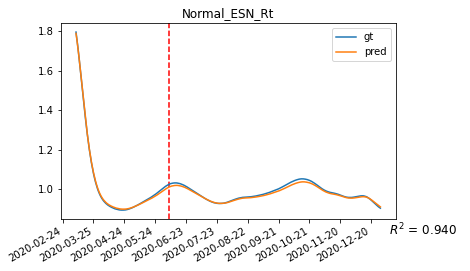

{'mae': 0.049458582, 'rmse': 0.05986744810167373, 'r2': -42.92456017279714}


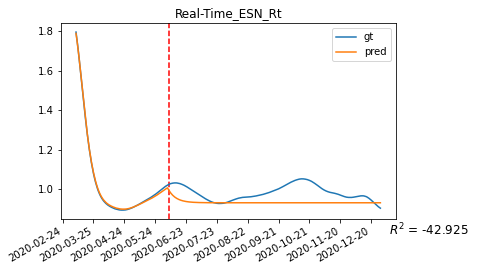

{'mae': 4703.939, 'rmse': 9245.100756616988, 'r2': 0.6325719568805673}


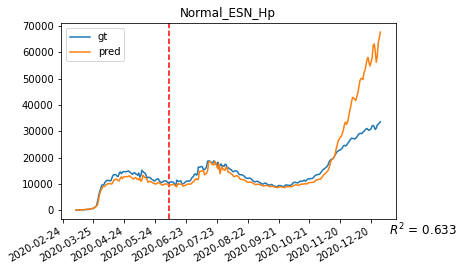

{'mae': 8162.6616, 'rmse': 10722.4862788441, 'r2': -9557.127231371738}


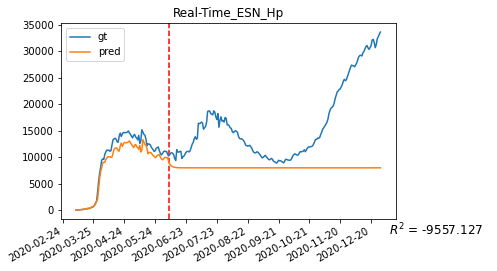

In [91]:
tar = [['Cases'],['Deaths'],['Rt'], ['Hp']]
for t, Data, sc in zip(tar, [C_together, D_together ,Rt_together, Hp_together], [sc_c, sc_d, sc_rt,sc_hp]):
    input_dim = output_dim = Data[1].shape[1]
    esn = etnn.LiESN(
        input_dim=input_dim,
        hidden_dim=64,
        output_dim=output_dim,
        learning_algo='pinv',
        win_generator = win_matrix_generator,
        wbias_generator = wbias_matrix_generator,
        w_generator = w_matrix_generator,
        leaky_rate = 1.0
    )
    for data in zip(Data[2], Data[3]):
        # Inputs and outputs
        inputs, targets = data
        inputs = inputs.view(1, -1, 1)
        targets = targets.view(1, -1, 1)
        # Transform data to Variables
        inputs, targets = Variable(inputs), Variable(targets)
        # ESN need inputs and targets
        esn(inputs, targets)
    # Now we finalize the training by
    esn.finalize()
    Evaluation(esn, Data[0], Data[1], t, sc, 'ESN')
    Realtime_Evaluation(esn, Data[0], Data[2], Data[1], t, sc, 'ESN')


### Use Regioned Model to predice US.csv

Train ESN
{'mae': 179016.11, 'rmse': 325998.61123630573, 'r2': 0.8260767655673813}


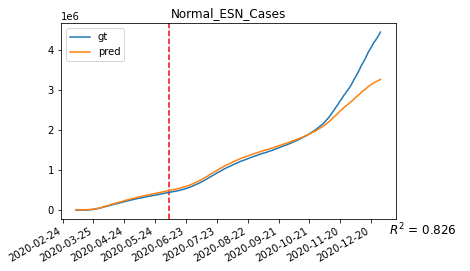

{'mae': 816621.4, 'rmse': 996425.9951968335, 'r2': -15.005270672206326}


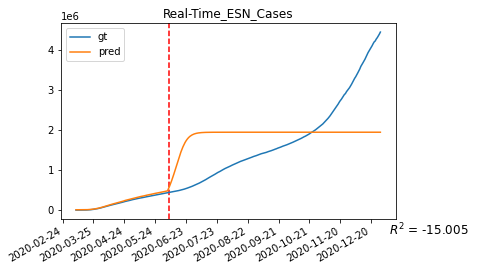

Train ESN
{'mae': 231753.39, 'rmse': 410838.48762256926, 'r2': 0.6919782112995634}


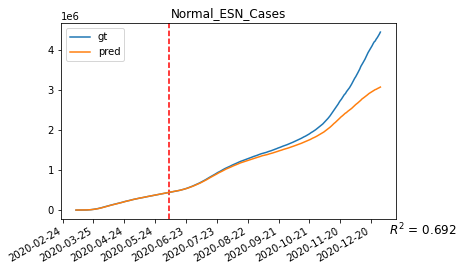

{'mae': 1066967.4, 'rmse': 1455951.651768698, 'r2': -258.694712118619}


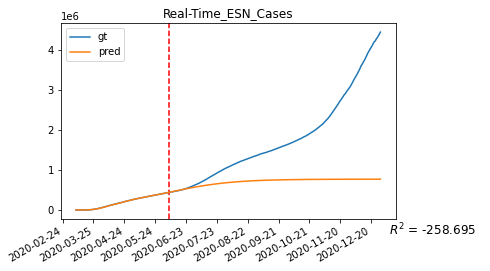

Train ESN
{'mae': 181264.34, 'rmse': 328296.2954405669, 'r2': 0.8316169961611334}


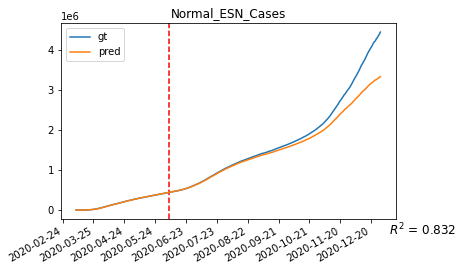

{'mae': 946854.0, 'rmse': 1345224.2926620082, 'r2': -94.36798565503967}


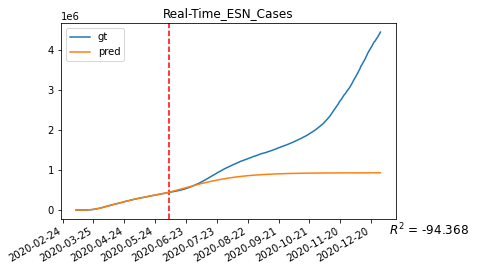

Train ESN
{'mae': 126529.39, 'rmse': 235850.39434353294, 'r2': 0.9263954377222297}


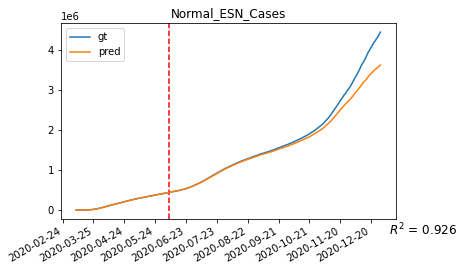

{'mae': 840416.6, 'rmse': 1235549.675686089, 'r2': -37.48813401658612}


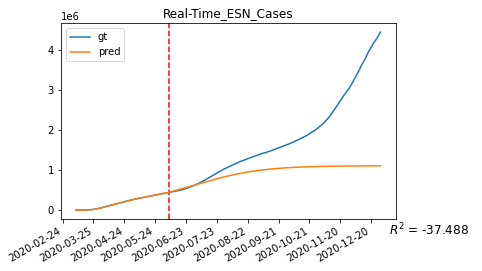

Train ESN
{'mae': 746.41345, 'rmse': 988.6533770740886, 'r2': 0.9868010493750716}


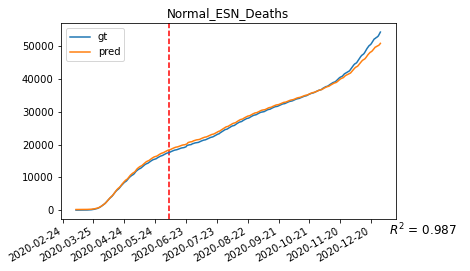

{'mae': 8095.268, 'rmse': 9421.691567866144, 'r2': -6.619600797240656}


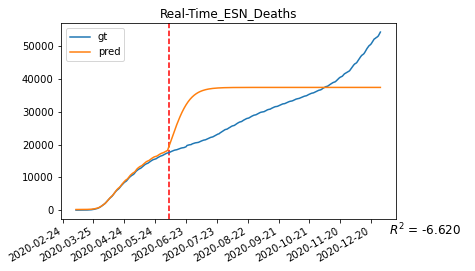

Train ESN
{'mae': 3416.3877, 'rmse': 4621.978797008917, 'r2': 0.4928877009831524}


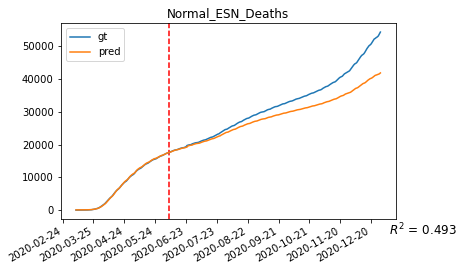

{'mae': 13299.192, 'rmse': 16320.036764664472, 'r2': -8936.443722434376}


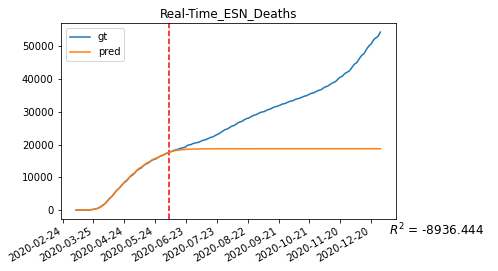

Train ESN
{'mae': 10197.137, 'rmse': 12524.193546891553, 'r2': -22.720254872219332}


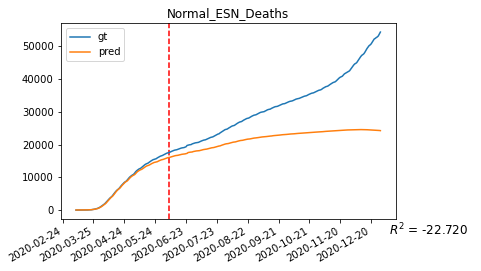

{'mae': 21739.205, 'rmse': 23862.51420114821, 'r2': -1281.504207942768}


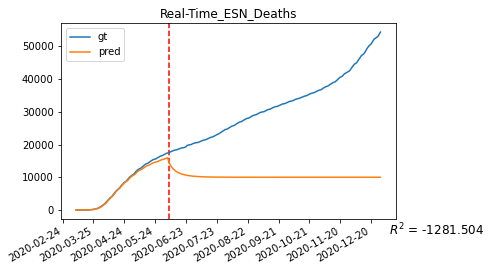

Train ESN
{'mae': 6686.977, 'rmse': 8136.598060614768, 'r2': -1.686010535572131}


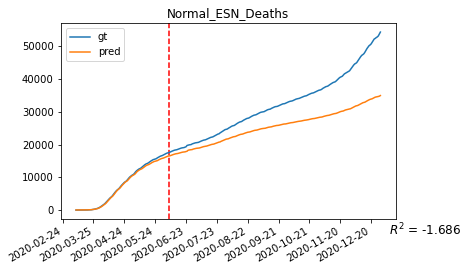

{'mae': 20998.826, 'rmse': 23215.5465152126, 'r2': -1010.6908955470099}


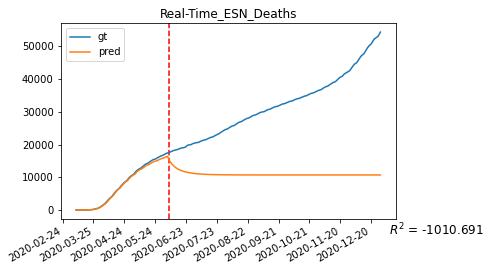

Train ESN
{'mae': 0.011204167, 'rmse': 0.012627157909778716, 'r2': 0.839782971941493}


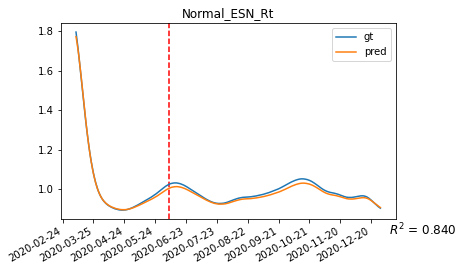

{'mae': 0.072831236, 'rmse': 0.08109791591083275, 'r2': -64.99844639911261}


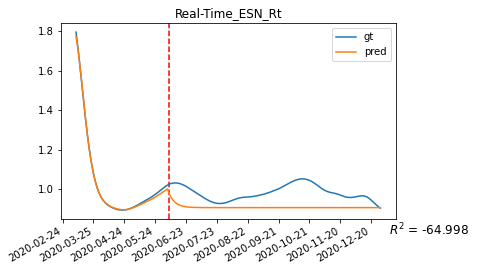

Train ESN
{'mae': 0.007605681, 'rmse': 0.008832130609988512, 'r2': 0.9279122060512088}


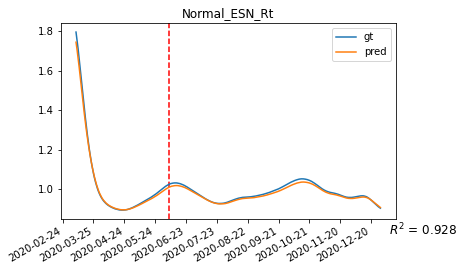

{'mae': 0.070881695, 'rmse': 0.07912099564225351, 'r2': -34.43847896023749}


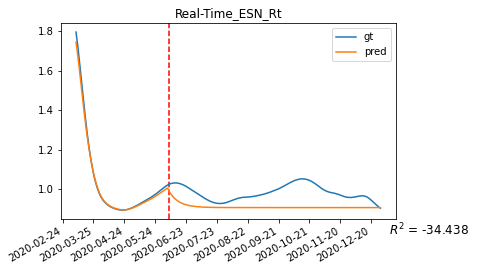

Train ESN
{'mae': 0.007511434, 'rmse': 0.00906492836930981, 'r2': 0.9199089736767683}


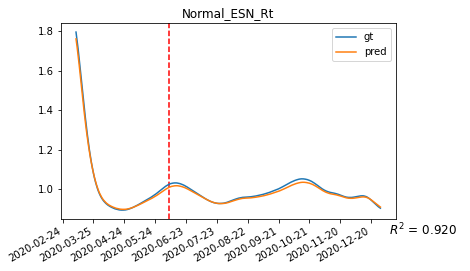

{'mae': 0.05585737, 'rmse': 0.06568537755898256, 'r2': -45.686607546624536}


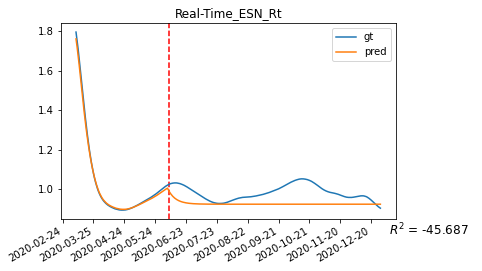

Train ESN
{'mae': 0.0021331727, 'rmse': 0.0027735916909885135, 'r2': 0.9945495335013637}


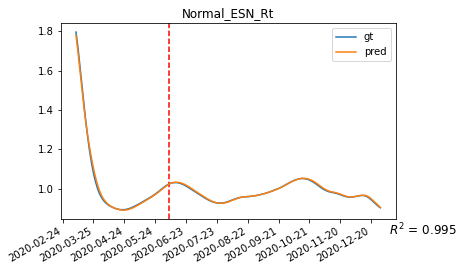

{'mae': 0.0891098, 'rmse': 0.09864982137285651, 'r2': -60.13863063132744}


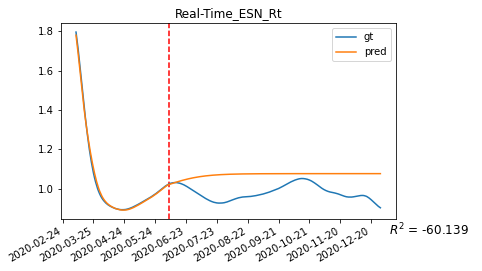

Train ESN
{'mae': 706.1641, 'rmse': 831.1599575292352, 'r2': 0.984114116084499}


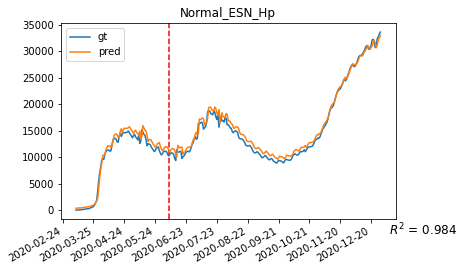

{'mae': 13071.689, 'rmse': 14603.544775156475, 'r2': -17.46093402943844}


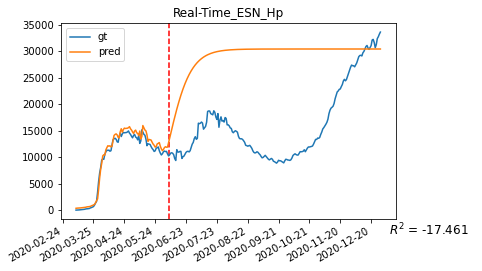

Train ESN
{'mae': 2842.4385, 'rmse': 4836.663932919053, 'r2': -1.4047218087489695}


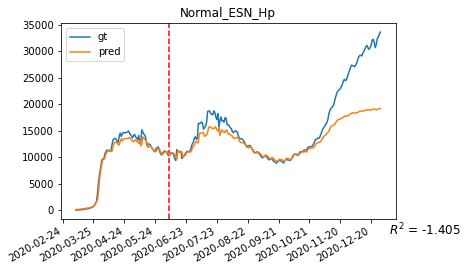

{'mae': 5881.8906, 'rmse': 8820.689315467358, 'r2': -114664.03941230469}


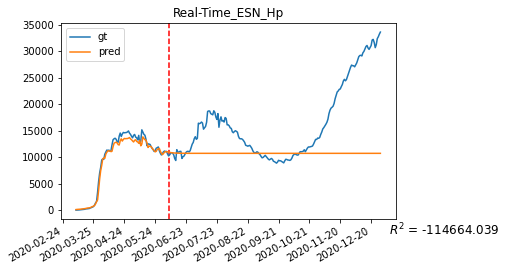

Train ESN
{'mae': 7251.7354, 'rmse': 11221.9976831222, 'r2': -24.864875655506506}


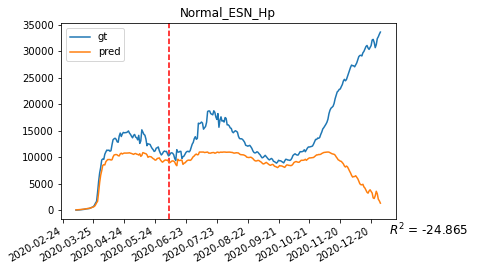

{'mae': 13450.002, 'rmse': 15297.434033196549, 'r2': -227.863931717262}


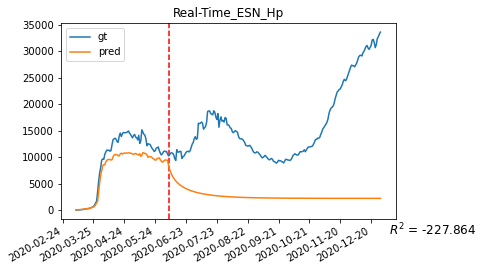

Train ESN
{'mae': 23983.307, 'rmse': 39628.58604593406, 'r2': -1.5494088636761227}


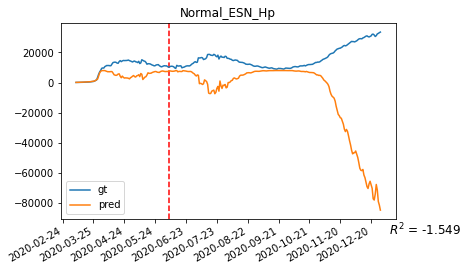

{'mae': 8406.801, 'rmse': 10899.492098258524, 'r2': -752040.2638907954}


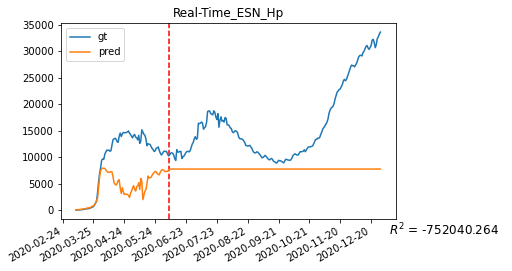

In [96]:

#Train ESN
tar = [['Cases'],['Deaths'], ['Rt'], ['Hp']]
target = ['C','D','Rt','Hp']
idx = 0
for t, Data, sc in zip(tar, [C_together, D_together, Rt_together, Hp_together], [sc_c, sc_d, sc_rt,sc_hp]):

  Region_Data = Region_targets_dict[target[idx]]
  idx += 1
  for R_Data in Region_Data:
    input_dim = output_dim = R_Data[1].shape[1]
    esn = etnn.LiESN(
        input_dim=input_dim,
        hidden_dim=64,
        output_dim=output_dim,
        learning_algo='pinv',
        win_generator = win_matrix_generator,
        wbias_generator = wbias_matrix_generator,
        w_generator = w_matrix_generator,
        leaky_rate = 1.0
    )
    print("Train ESN")
    for data in zip(R_Data[2], R_Data[3]):
        # Inputs and outputs
        inputs, targets = data
        inputs = inputs.view(1, -1, 1)
        targets = targets.view(1, -1, 1)
        # Transform data to Variables
        inputs, targets = Variable(inputs), Variable(targets)
        # ESN need inputs and targets
        esn(inputs, targets)
    # Now we finalize the training by
    esn.finalize()
    Evaluation(esn, Data[0], Data[1], t, sc,'ESN')
    Realtime_Evaluation(esn, Data[0], Data[2], Data[1], t, sc,'ESN')

  
  